In [ ]:
# %%

import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
from collections import defaultdict
import json

# %% [markdown]

 ### TODO: setup
 - Capture the k, v ,q projections
 - determine a way to setup


In [ ]:
# %%

class DatasetTypes(Enum):
    WIKI = ("wikitext", "wikitext-2-raw-v1")
    INTERNET = ("allenai/c4", "en")
    CODE = "bigcode/starcoderdata"
    ASSISTANT = "HuggingFaceH4/ultrachat_200k"


def get_dataset(dataset_type: DatasetTypes):
    if dataset_type == DatasetTypes.WIKI or dataset_type == DatasetTypes.INTERNET:
        return load_dataset(
            dataset_type.value[0], dataset_type.value[1], streaming=True
        )
    return load_dataset(dataset_type.value, streaming=True)

In [ ]:
# %%

dataset = get_dataset(DatasetTypes.INTERNET)

In [ ]:
# %%

# Load tokenizer and model
num_samples = 15
max_clusters = 10
head_dim = 768
min_seq_len = 1024

model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)

In [ ]:
# %%

all_intermediates = defaultdict(list)


def get_activation(name):
    def hook(module, input, output):
        all_intermediates[name].append(output.detach())

    return hook


# Register hooks for each attention layer
for name, module in model.named_modules():
    if "attn.c_attn" in name:
        print(f"{name}")
        module.register_forward_hook(get_activation(name))

transformer.h.0.attn.c_attn
transformer.h.1.attn.c_attn
transformer.h.2.attn.c_attn
transformer.h.3.attn.c_attn
transformer.h.4.attn.c_attn
transformer.h.5.attn.c_attn
transformer.h.6.attn.c_attn
transformer.h.7.attn.c_attn
transformer.h.8.attn.c_attn
transformer.h.9.attn.c_attn
transformer.h.10.attn.c_attn
transformer.h.11.attn.c_attn


In [ ]:
# %%

stream = iter(dataset["train"])

In [ ]:
# %%

for i in range(num_samples):
    input_text = next(stream)["text"]
    combined_text = input_text
    inputs = tokenizer(combined_text, return_tensors="pt")
    sequence_length = inputs.input_ids.shape[1]

    while sequence_length < min_seq_len:
        combined_text += " " + input_text
        inputs = tokenizer(combined_text, return_tensors="pt")
        sequence_length = inputs.input_ids.shape[1]

    # cap length of input to min sequence length tokens
    inputs_sliced = {
        "input_ids": inputs.input_ids[:, :min_seq_len],
        "attention_mask": inputs.attention_mask[:, :min_seq_len],
    }

    sequence_length = inputs_sliced["input_ids"].shape[1]

    # Run the model
    with torch.no_grad():
        outputs = model(**inputs_sliced)

Token indices sequence length is longer than the specified maximum sequence length for this model (1141 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
# %%

from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Layer: transformer.h.0.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.0.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.0.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.0.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.0.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.0.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.0.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.0.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.0.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.0.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: tra

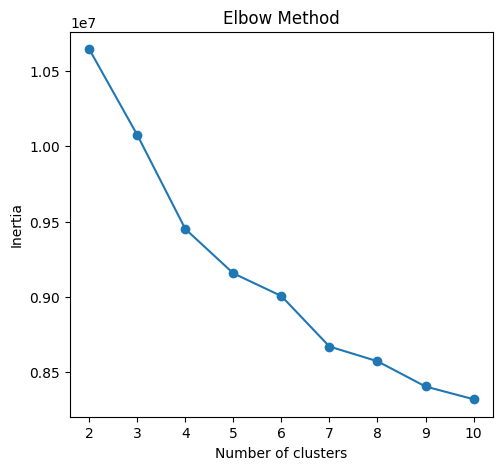

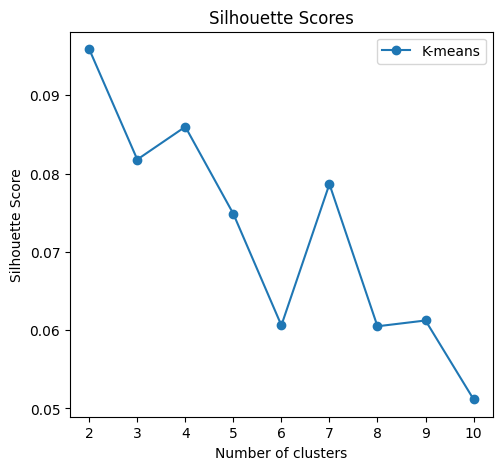

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2
Layer: transformer.h.1.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.1.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.1.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.1.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.1.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.1.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.1.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.1.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.1.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.1.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torc

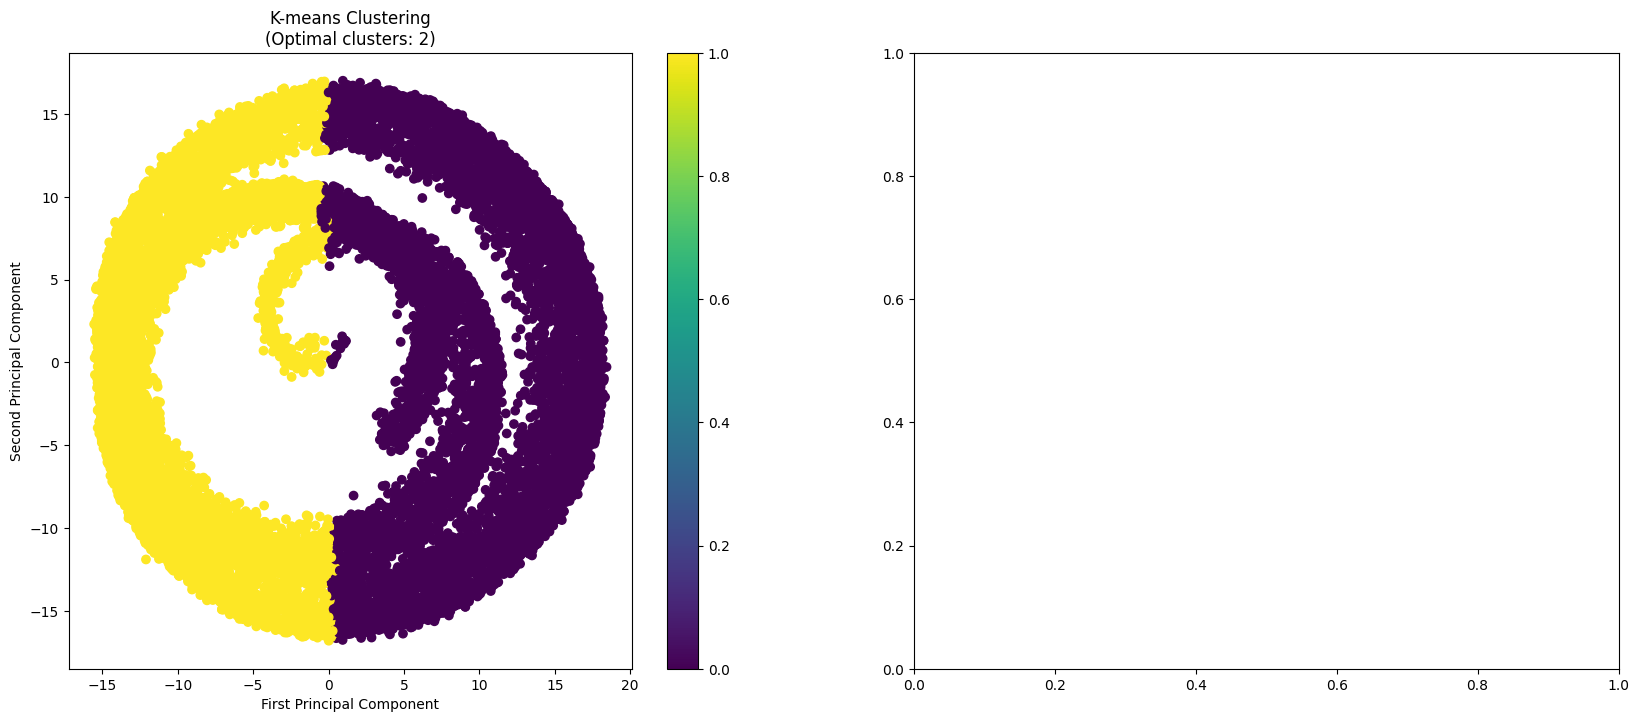

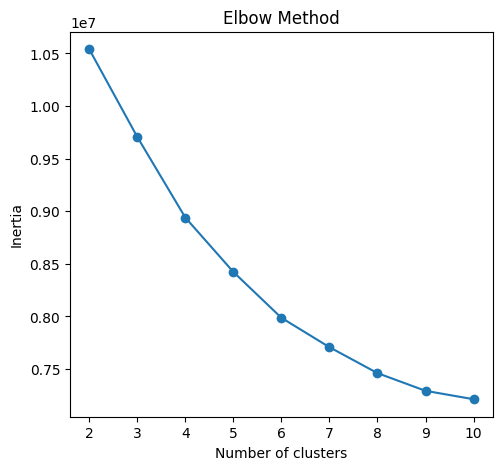

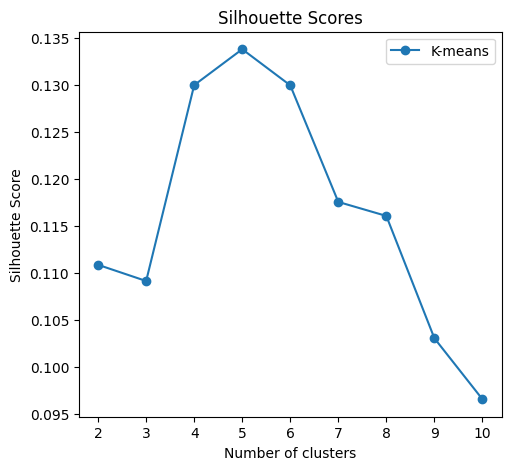

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 5
Layer: transformer.h.2.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.2.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.2.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.2.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.2.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.2.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.2.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.2.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.2.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.2.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torc

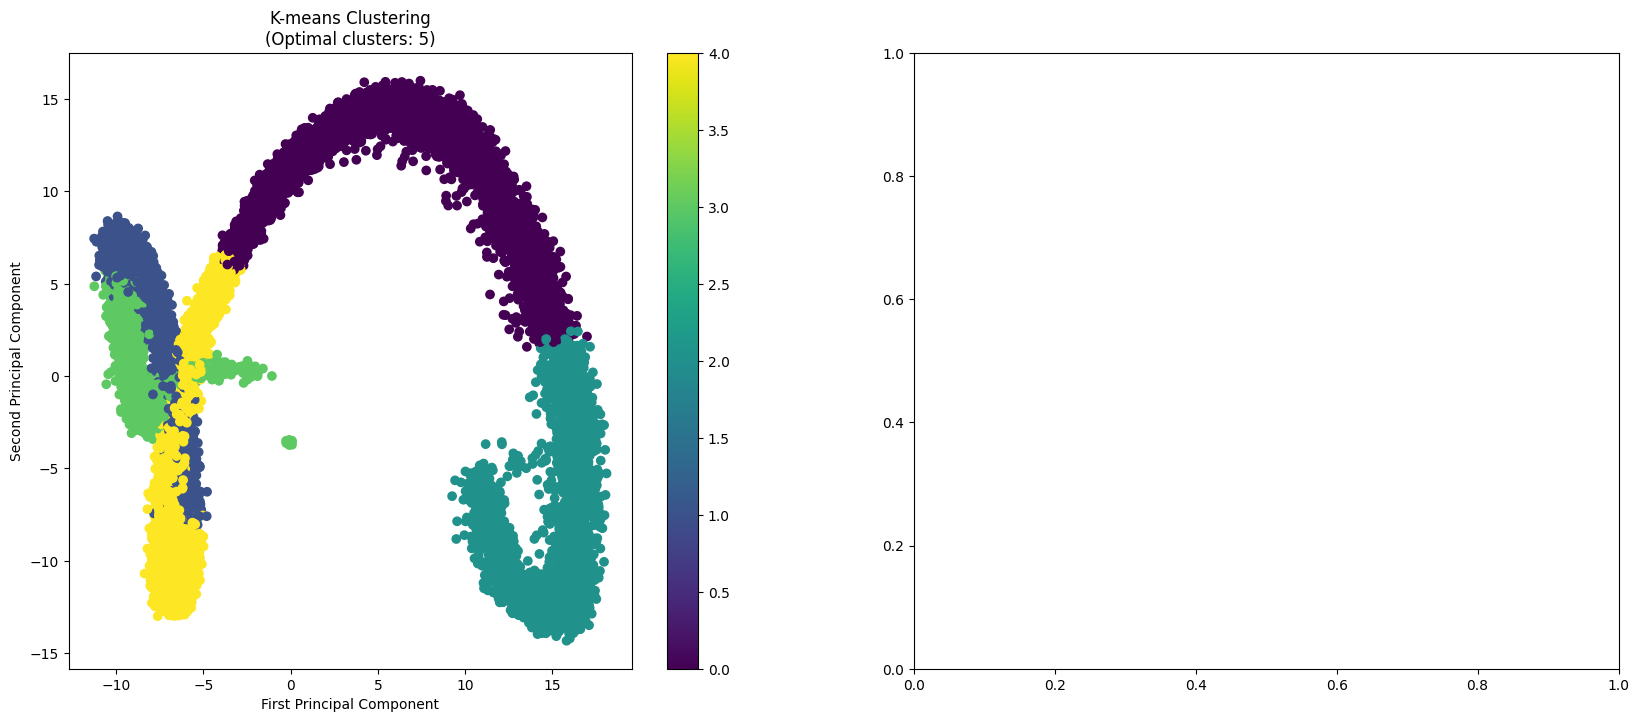

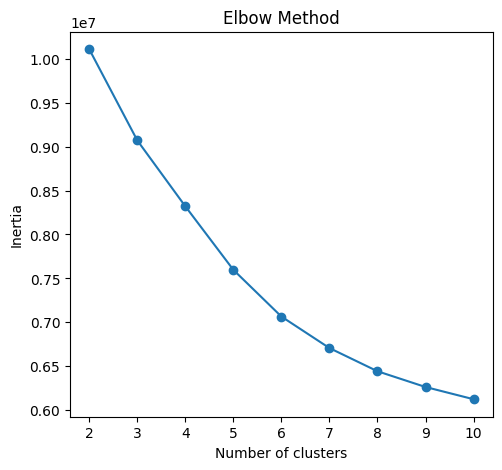

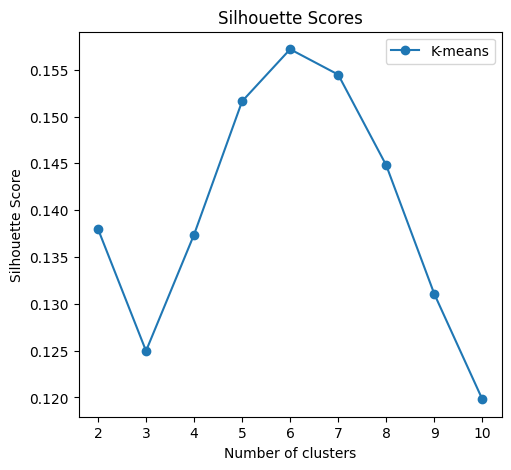

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 6
Layer: transformer.h.3.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.3.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.3.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.3.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.3.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.3.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.3.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.3.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.3.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.3.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torc

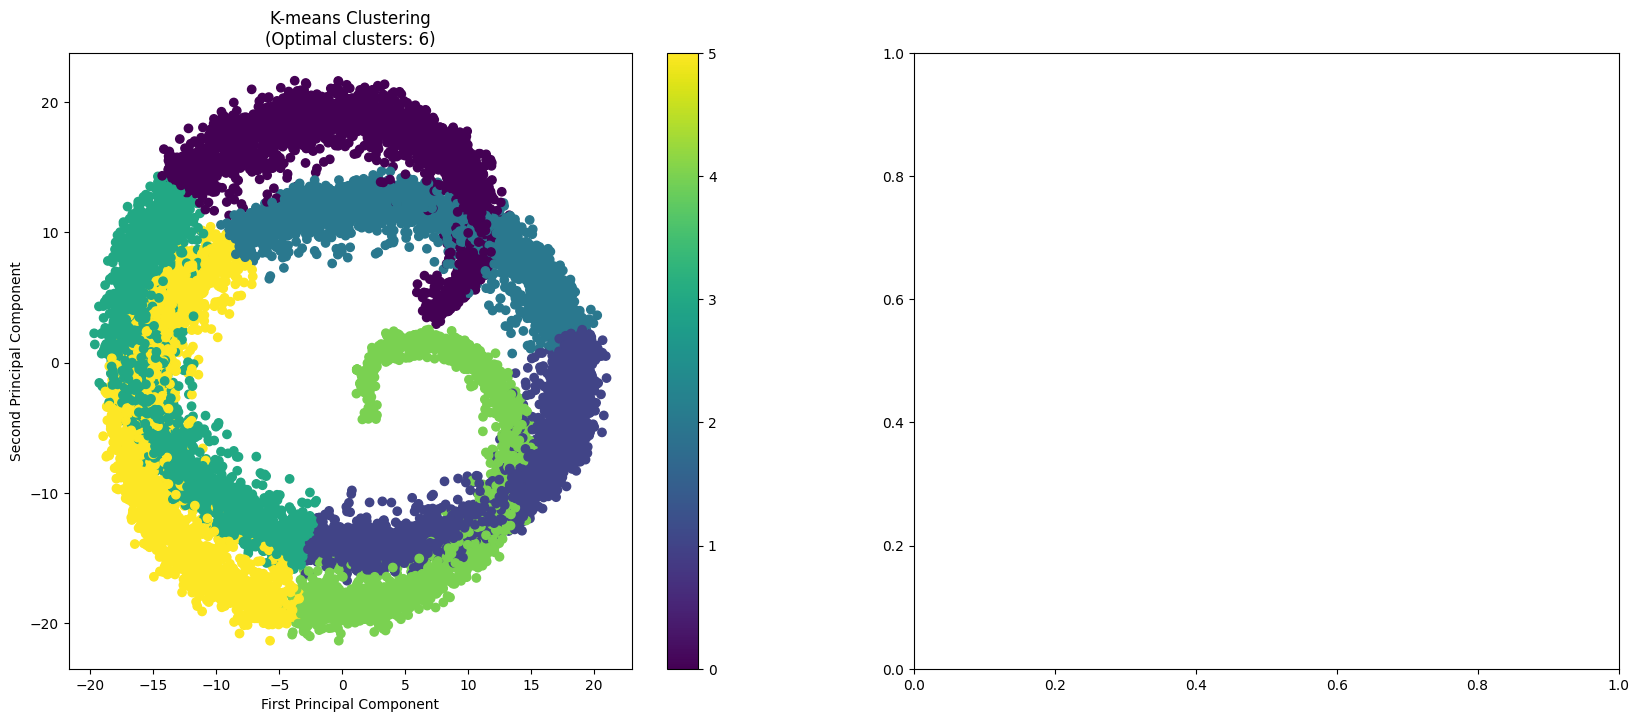

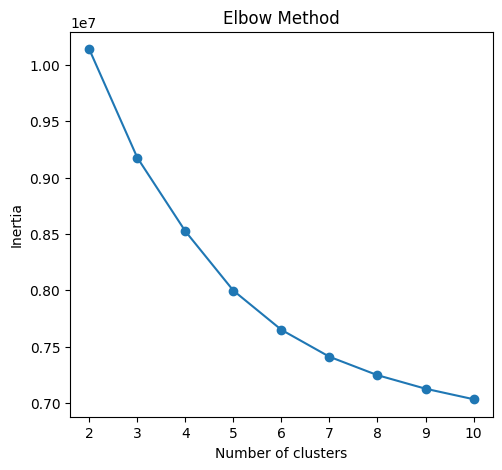

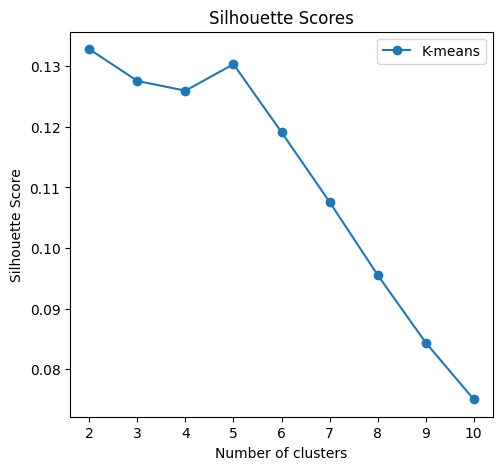

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2
Layer: transformer.h.4.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.4.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.4.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.4.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.4.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.4.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.4.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.4.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.4.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.4.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torc

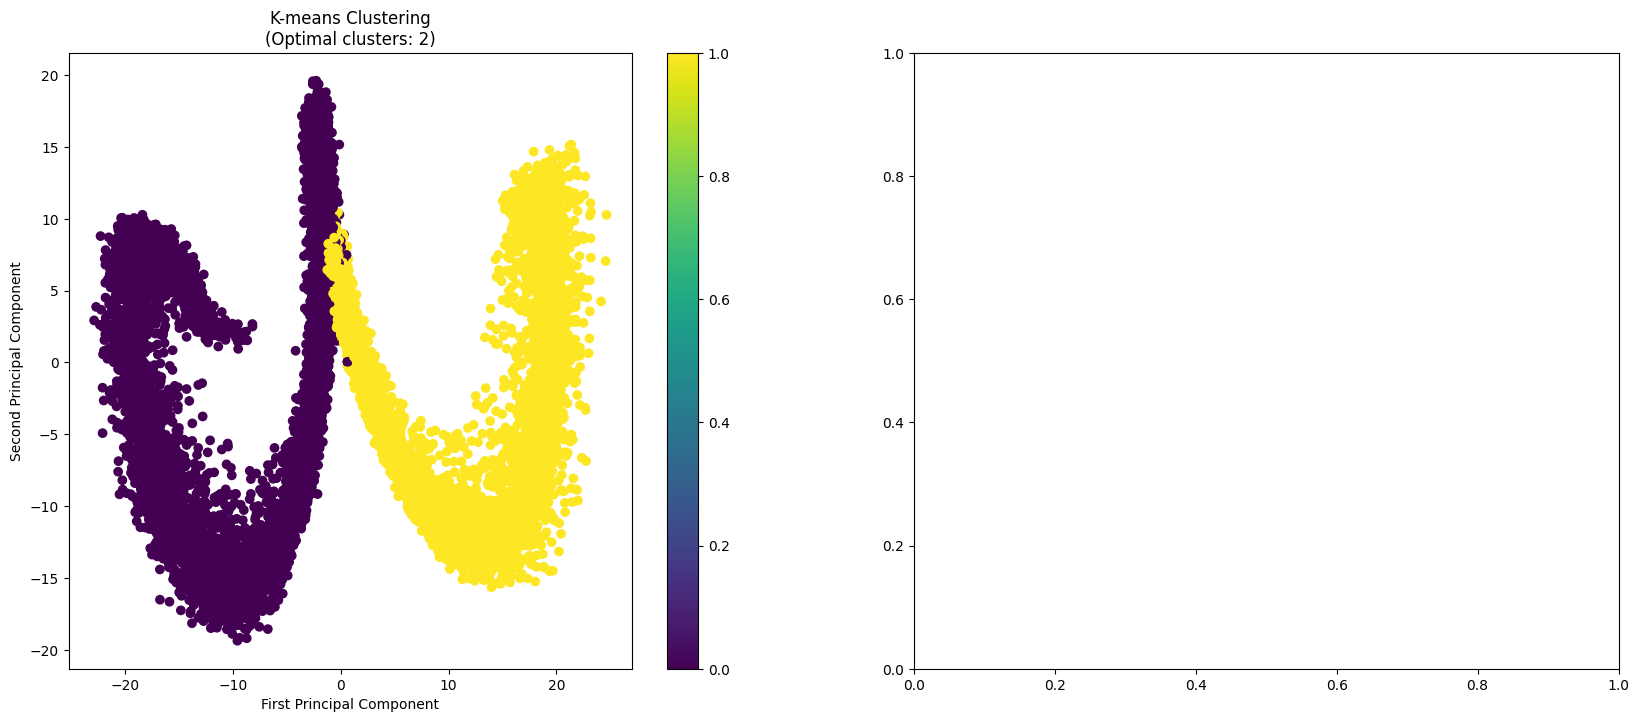

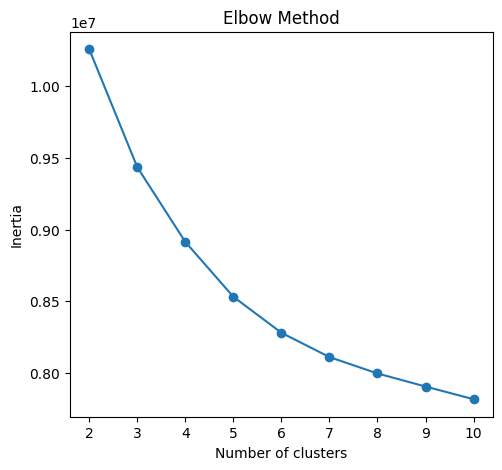

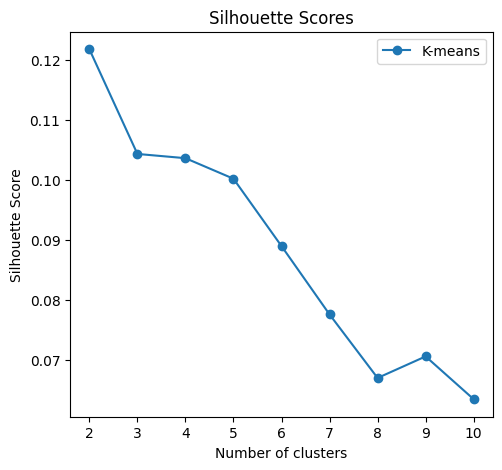

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2
Layer: transformer.h.5.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.5.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.5.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.5.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.5.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.5.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.5.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.5.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.5.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.5.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torc

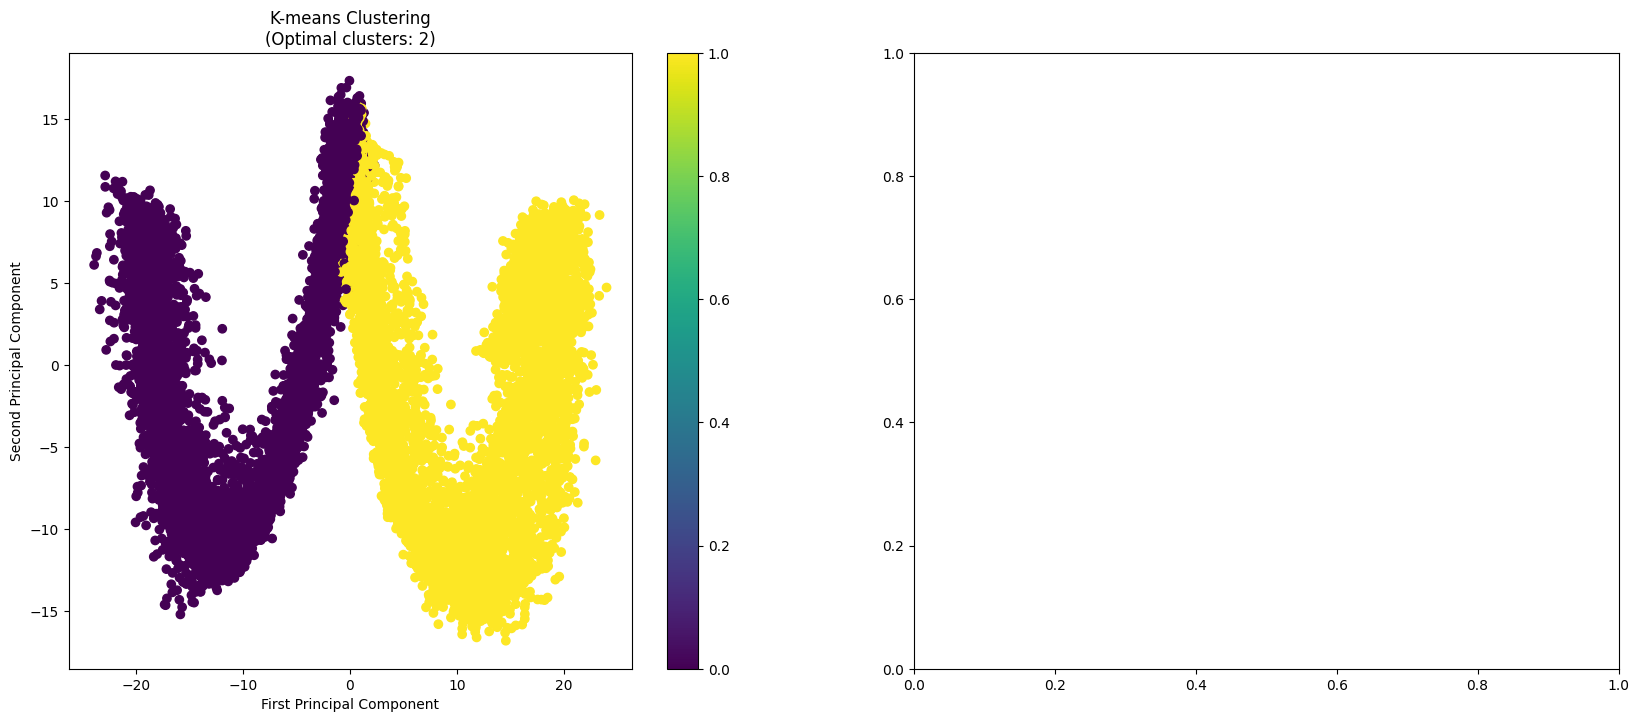

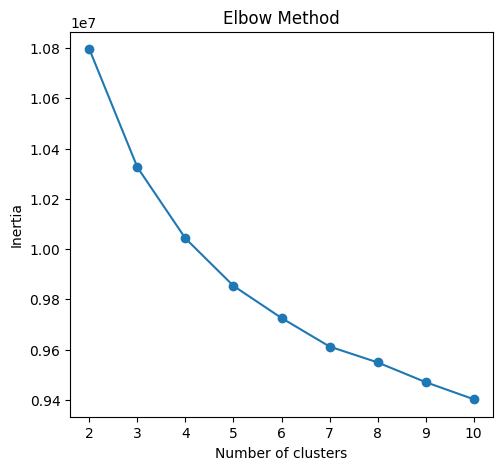

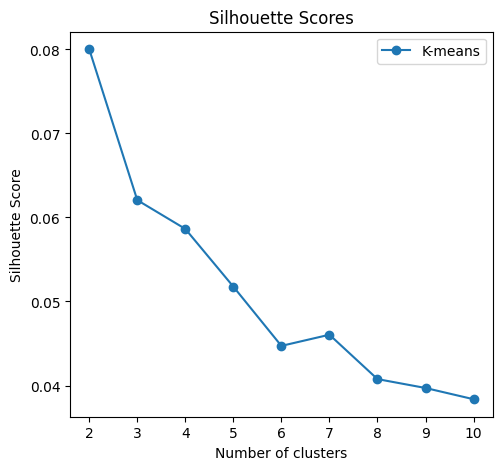

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2
Layer: transformer.h.6.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.6.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.6.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.6.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.6.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.6.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.6.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.6.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.6.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.6.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torc

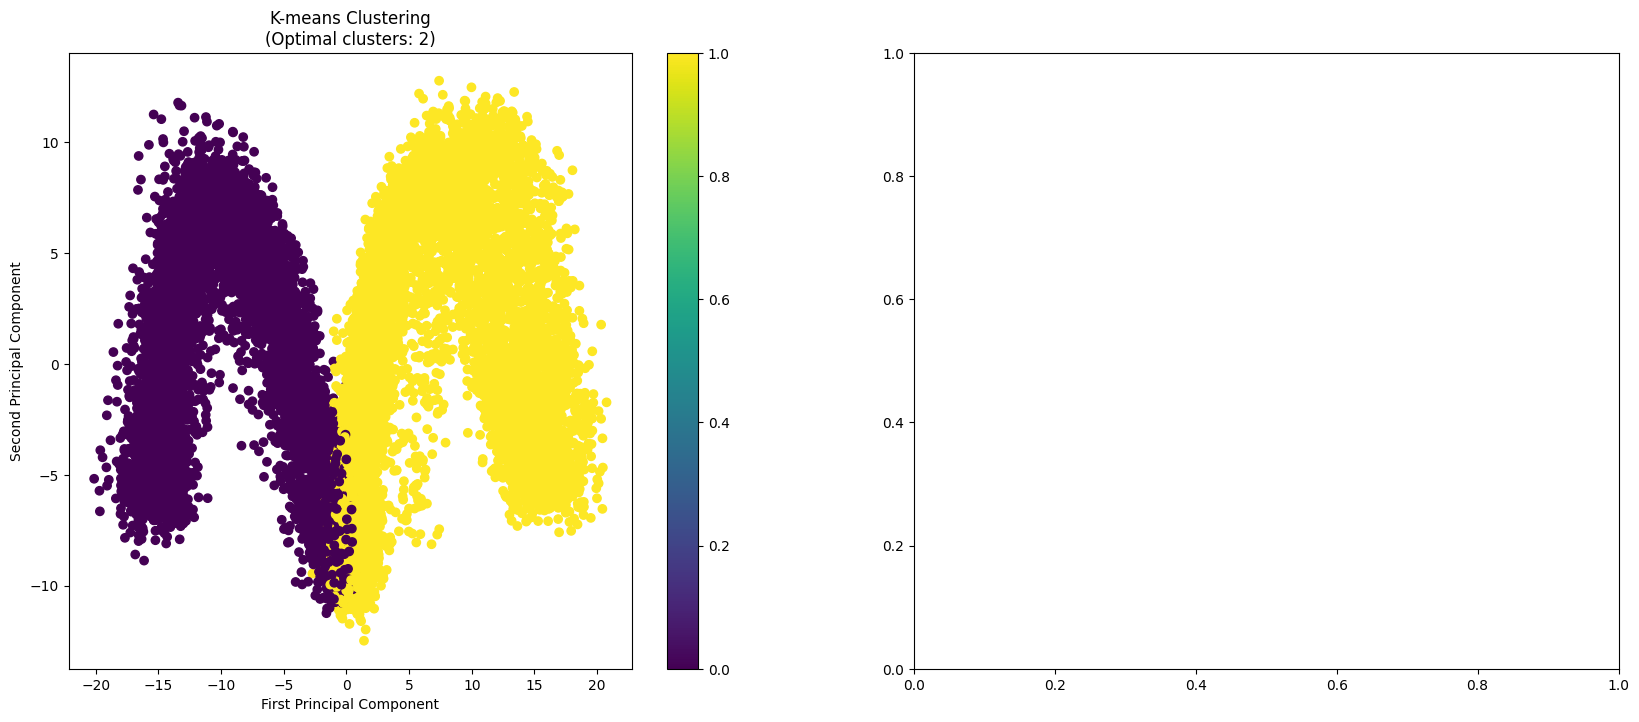

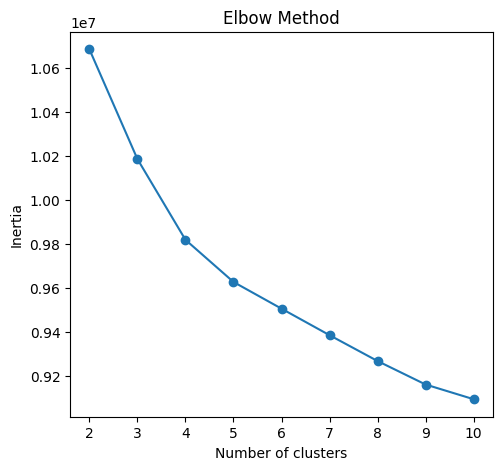

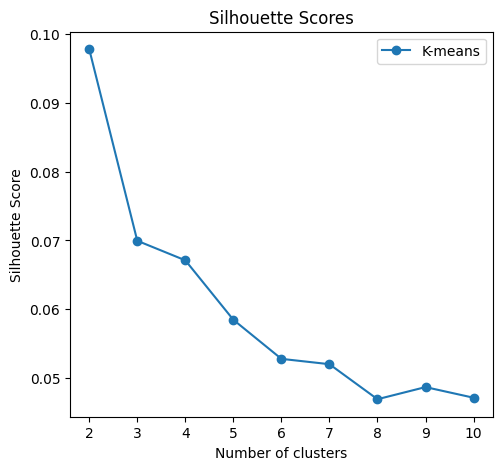

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2
Layer: transformer.h.7.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.7.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.7.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.7.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.7.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.7.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.7.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.7.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.7.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.7.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torc

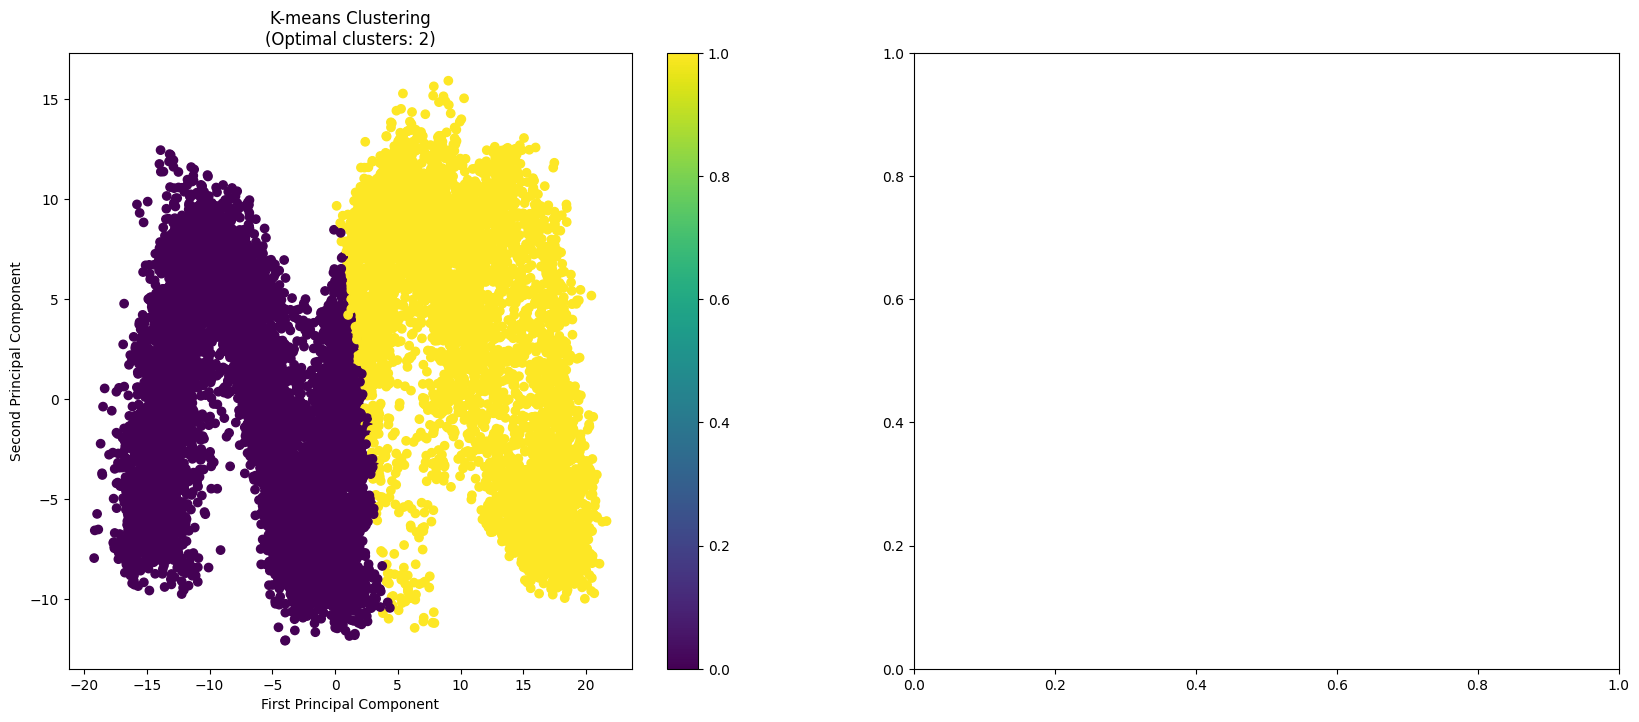

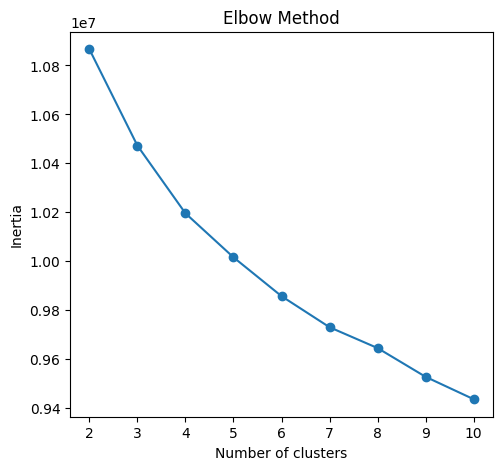

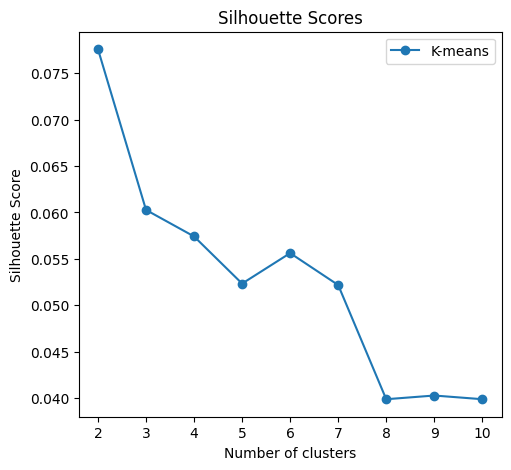

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2
Layer: transformer.h.8.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.8.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.8.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.8.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.8.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.8.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.8.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.8.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.8.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.8.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torc

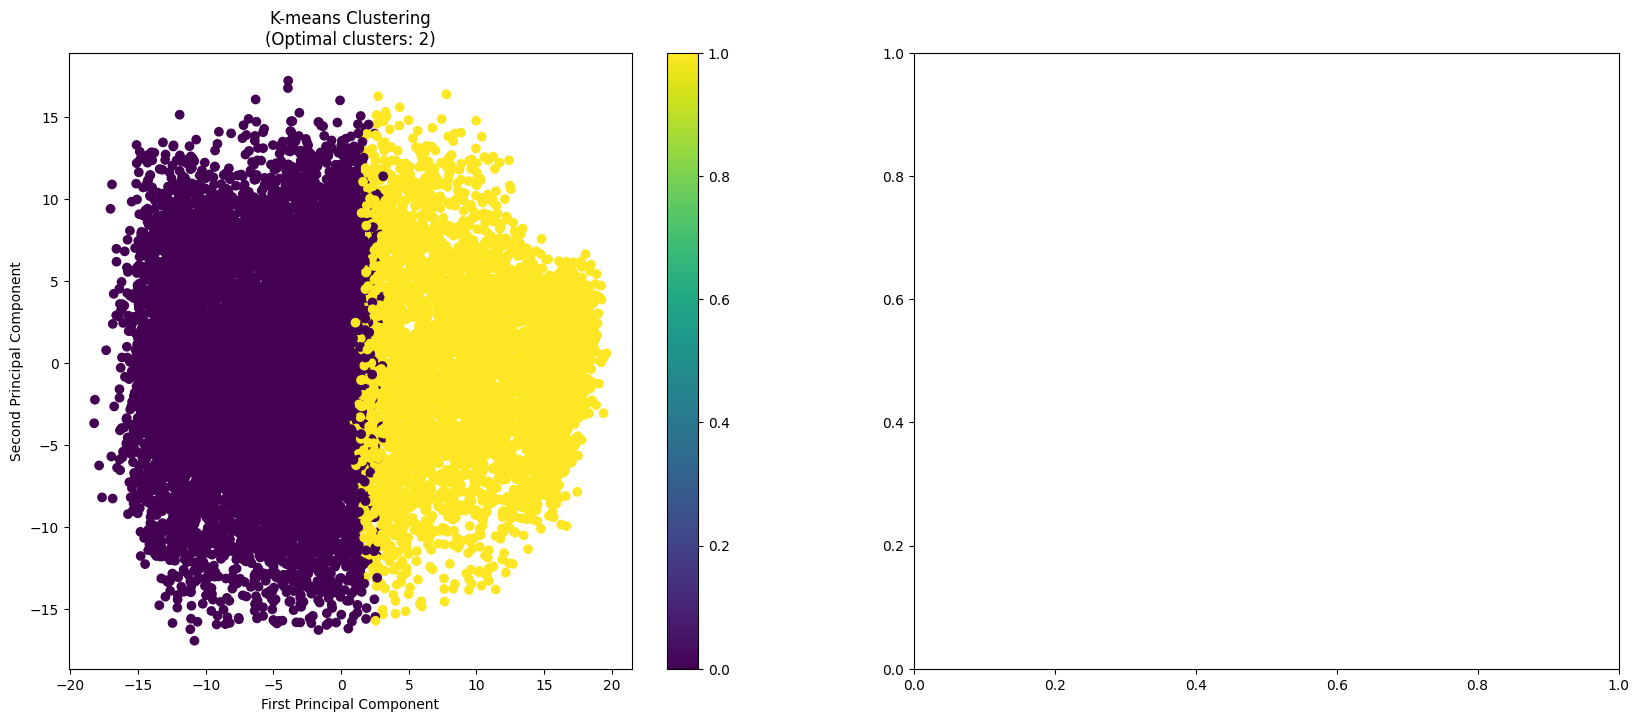

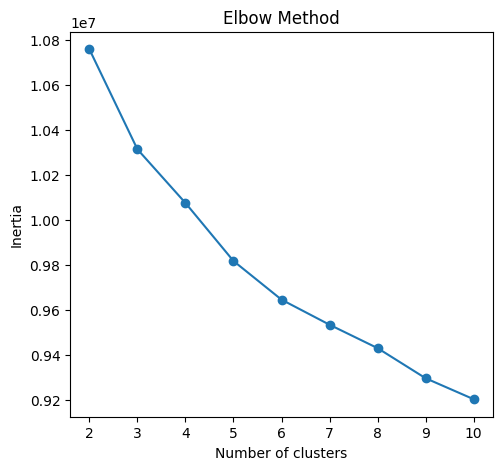

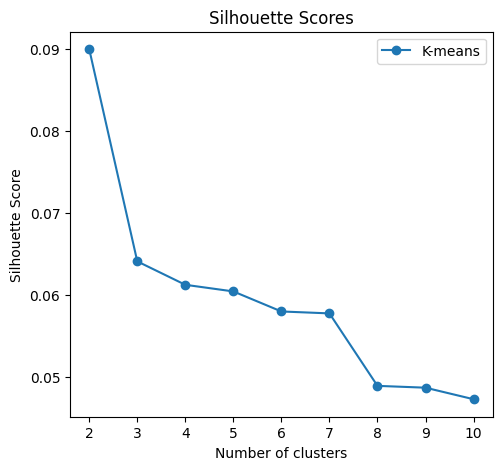

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2
Layer: transformer.h.9.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.9.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.9.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.9.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.9.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.9.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.9.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.9.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.9.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.9.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torc

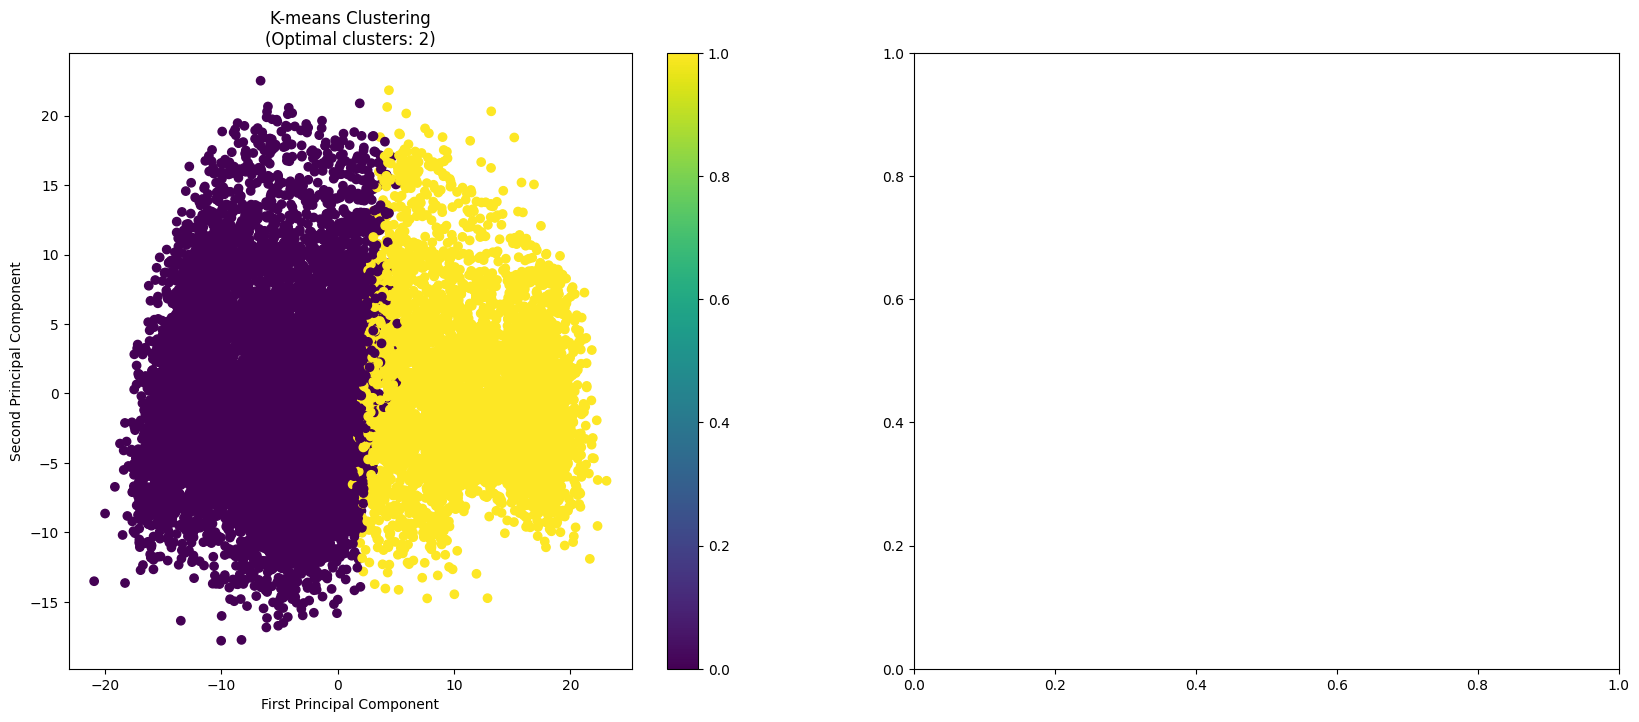

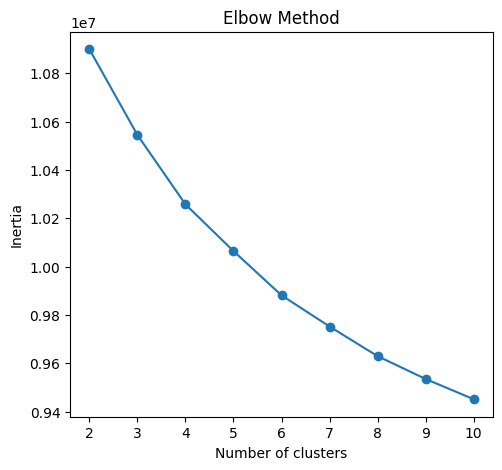

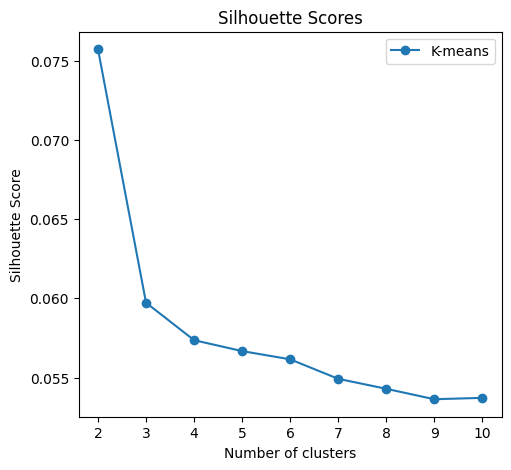

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2
Layer: transformer.h.10.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.10.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.10.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.10.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.10.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.10.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.10.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.10.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.10.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.10.attn.c_attn
torch.Size([1024, 2304])
  Query s

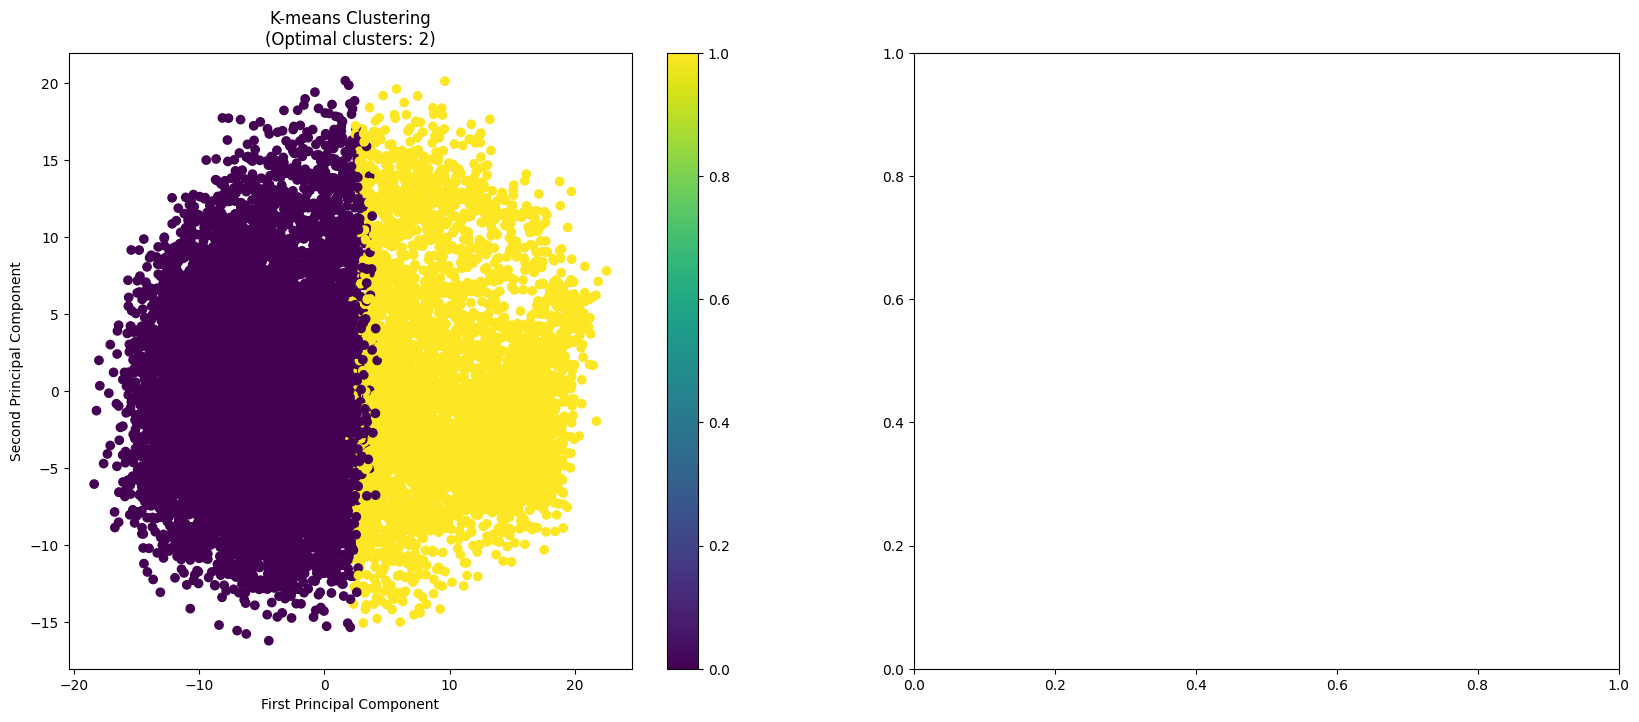

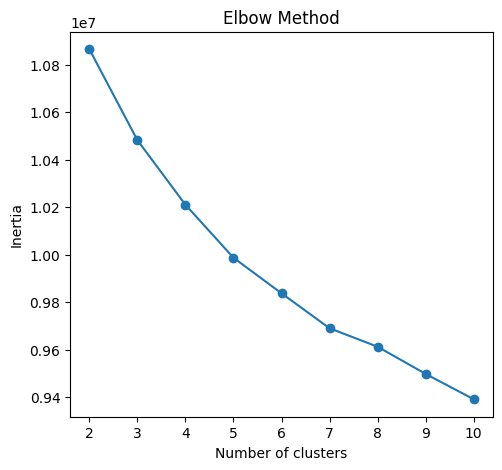

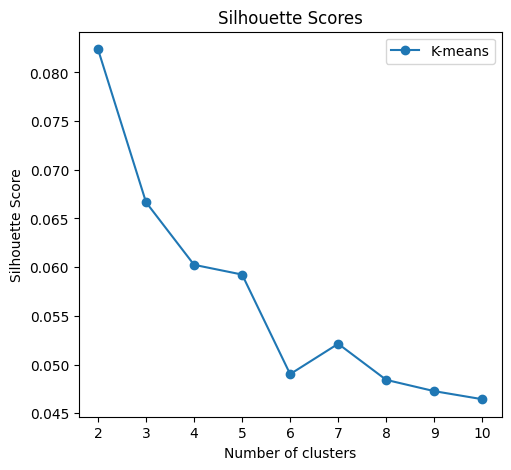

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2
Layer: transformer.h.11.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.11.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.11.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.11.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.11.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.11.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.11.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.11.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.11.attn.c_attn
torch.Size([1024, 2304])
  Query shape: torch.Size([1024, 768])
Layer: transformer.h.11.attn.c_attn
torch.Size([1024, 2304])
  Query s

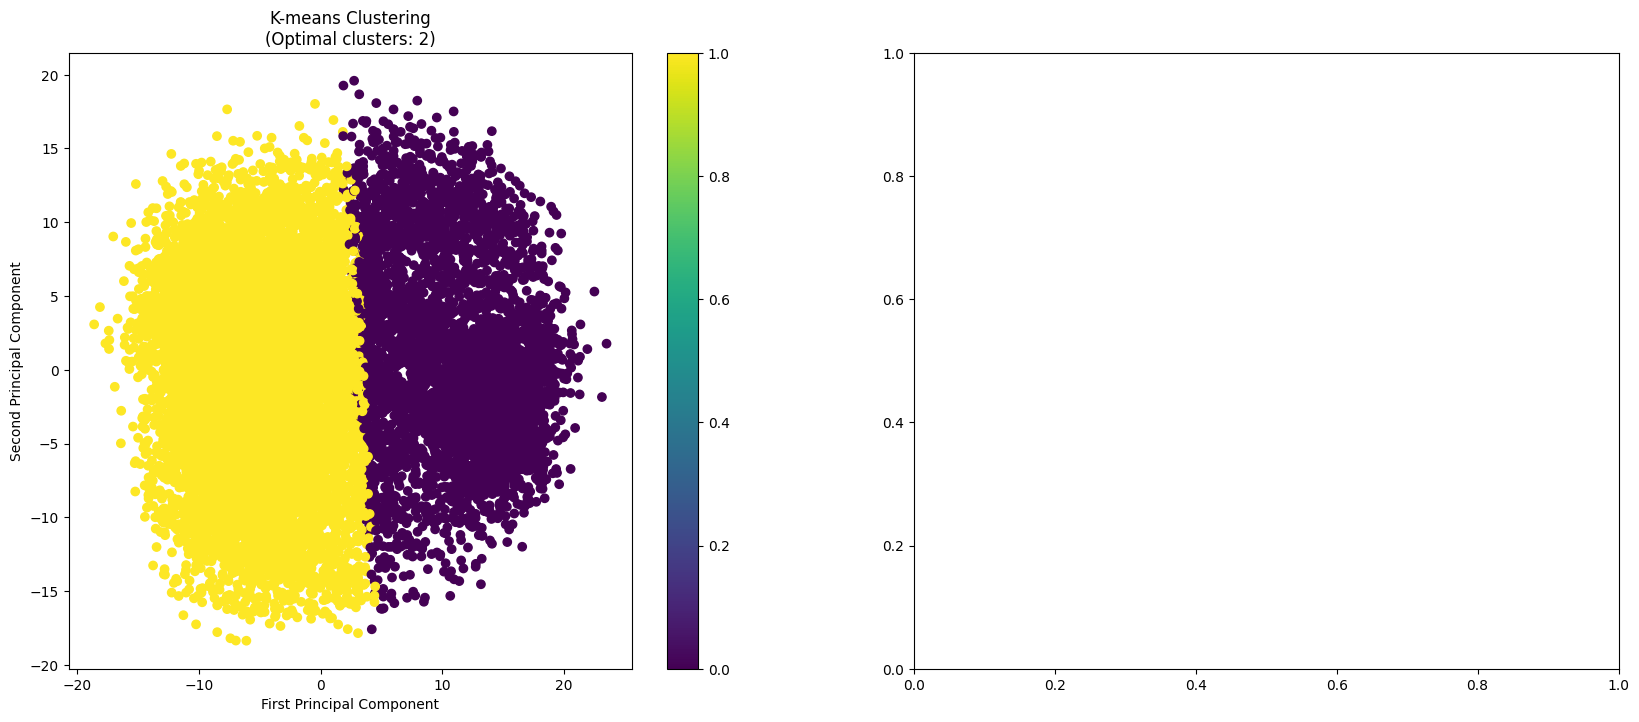

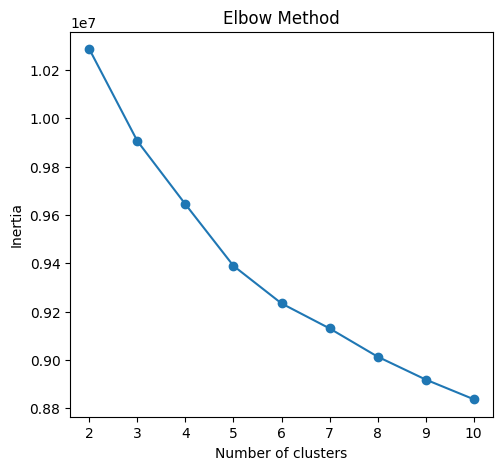

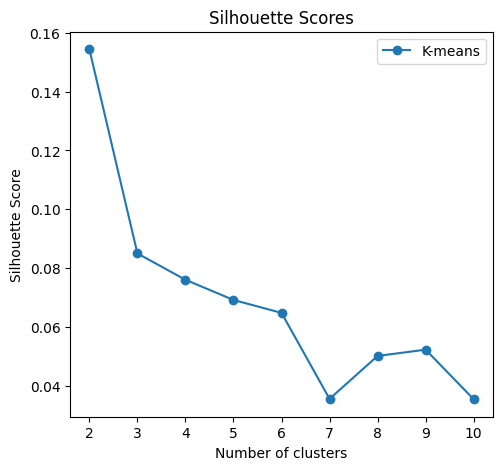

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


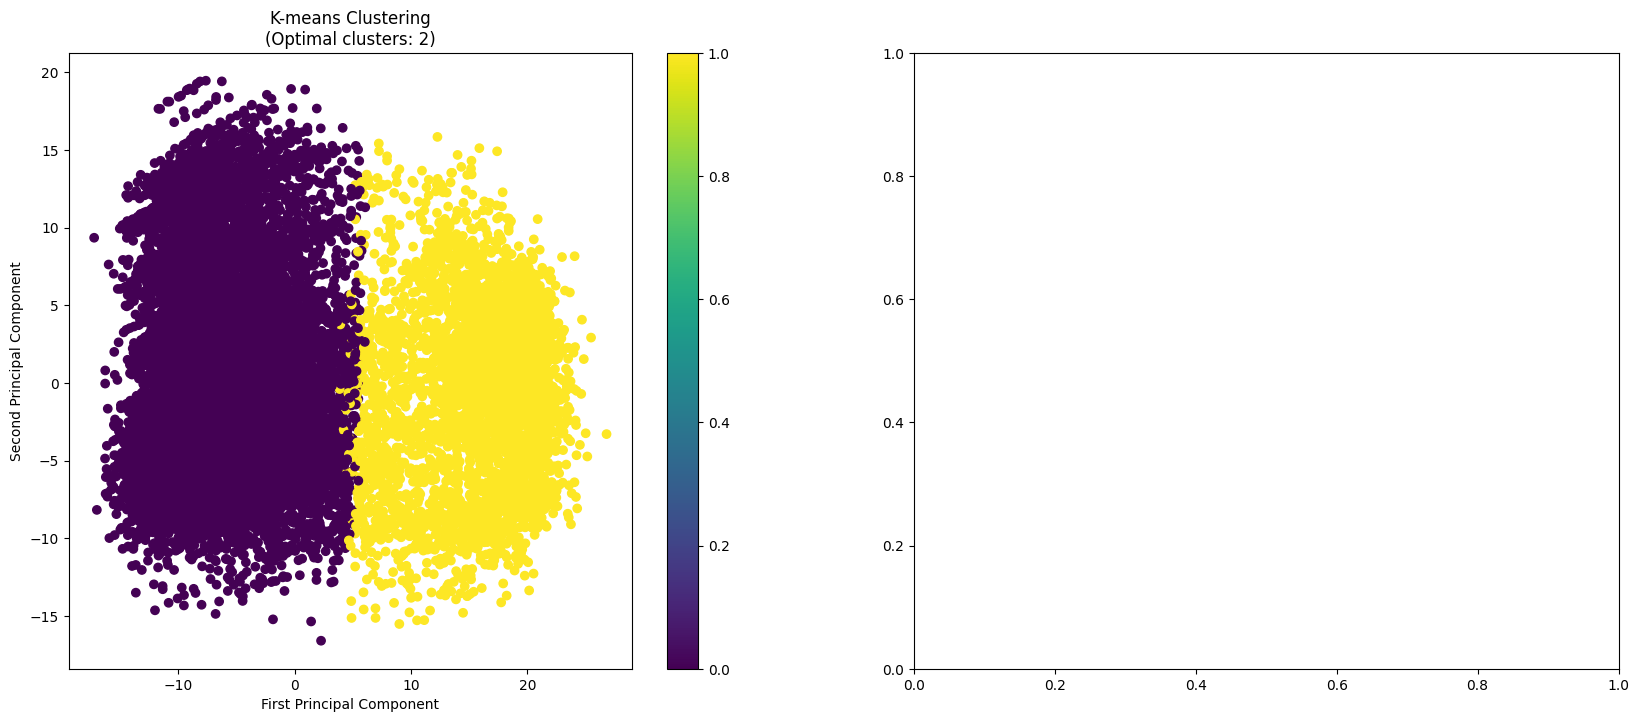

In [ ]:
# %%

clusters = np.random.randn(2, head_dim)
for name, samples_out in all_intermediates.items():
    all_q_projs = []
    for qkv in samples_out:
        qkv = qkv.squeeze(0)
        print(f"Layer: {name}")
        # The c_attn output contains q, k, v concatenated
        print(f"{qkv.shape}")
        split_size = qkv.size(-1) // 3
        q, k, v = torch.split(qkv, split_size, dim=-1)
        print(f"  Query shape: {q.shape}")
        all_q_projs.append(q.numpy())

        # alignments = np.dot(q, clusters.T)
        # print(f"{alignments=}")

    all_q_projs = np.vstack(all_q_projs)
    # Standardize the data
    scaler = StandardScaler()
    all_queries_scaled = scaler.fit_transform(all_q_projs)

    # Compute inertias and silhouette scores for different numbers of clusters
    inertias = []
    kmeans_silhouette_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(all_queries_scaled)
        inertias.append(kmeans.inertia_)
        kmeans_silhouette_scores.append(
            silhouette_score(all_queries_scaled, kmeans.labels_)
        )

    # Plot elbow curve
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(range(2, max_clusters + 1), inertias, marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Method")

    # Plot silhouette scores
    plt.figure(figsize=(12, 5))
    plt.subplot(122)
    plt.plot(
        range(2, max_clusters + 1),
        kmeans_silhouette_scores,
        marker="o",
        label="K-means",
    )

    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores")
    plt.legend()
    plt.show()

    plt.tight_layout()
    plt.show()

    # Determine optimal number of clusters for each method
    kmeans_optimal = kmeans_silhouette_scores.index(max(kmeans_silhouette_scores)) + 2

    print(f"Optimal clusters (K-means): {kmeans_optimal}")
    # print(f"Optimal clusters (Spectral): {spectral_optimal}")

    # Perform clustering with optimal number and visualize
    kmeans = KMeans(n_clusters=kmeans_optimal, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(all_queries_scaled)

    # Use PCA to reduce to 2D for visualization
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    queries_2d = pca.fit_transform(all_queries_scaled)

    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(20, 8))

    scatter1 = ax1.scatter(
        queries_2d[:, 0], queries_2d[:, 1], c=kmeans_labels, cmap="viridis"
    )
    ax1.set_title(f"K-means Clustering\n(Optimal clusters: {kmeans_optimal})")
    ax1.set_xlabel("First Principal Component")
    ax1.set_ylabel("Second Principal Component")
    plt.colorbar(scatter1, ax=ax1)

In [ ]:
# %%

clusters = np.random.randn(2, head_dim)
for name, samples_out in all_intermediates.items():
    all_q_projs = []
    for qkv in samples_out:
        qkv = qkv.squeeze(0)
        # The c_attn output contains q, k, v concatenated
        split_size = qkv.size(-1) // 3
        q, k, v = torch.split(qkv, split_size, dim=-1)
        print(f"  Query shape: {q.shape}")
        all_q_projs.append(q.numpy())

        # alignments = np.dot(q, clusters.T)

    all_q_projs = np.vstack(all_q_projs)
    # Standardize the data
    scaler = StandardScaler()
    all_queries_scaled = scaler.fit_transform(all_q_projs)

    # Compute inertias and silhouette scores for different numbers of clusters
    inertias = []
    kmeans_silhouette_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(all_queries_scaled)
        inertias.append(kmeans.inertia_)
        kmeans_silhouette_scores.append(
            silhouette_score(all_queries_scaled, kmeans.labels_)
        )

    # Plot elbow curve
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(range(2, max_clusters + 1), inertias, marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Method")

    # Plot silhouette scores
    plt.figure(figsize=(12, 5))
    plt.subplot(122)
    plt.plot(
        range(2, max_clusters + 1),
        kmeans_silhouette_scores,
        marker="o",
        label="K-means",
    )

    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores")
    plt.legend()
    plt.show()

    plt.tight_layout()
    plt.show()

    # Determine optimal number of clusters for each method
    kmeans_optimal = kmeans_silhouette_scores.index(max(kmeans_silhouette_scores)) + 2

    print(f"Optimal clusters (K-means): {kmeans_optimal}")

    # Perform clustering with optimal number and visualize
    kmeans = KMeans(n_clusters=kmeans_optimal, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(all_queries_scaled)

    # Use PCA to reduce to 2D for visualization
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    queries_2d = pca.fit_transform(all_queries_scaled)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(queries_2d[:, 0], queries_2d[:, 1], c=cluster_labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(f'Query Clusters for {name}\n(Optimal clusters: {k_means_optimal})')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


KeyboardInterrupt: 

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


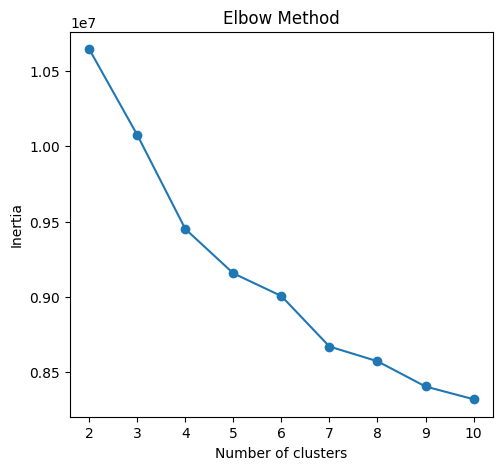

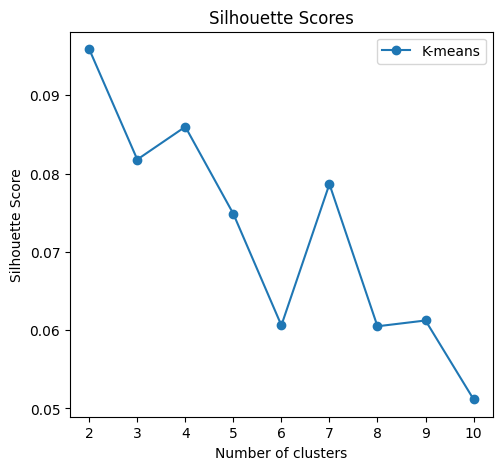

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


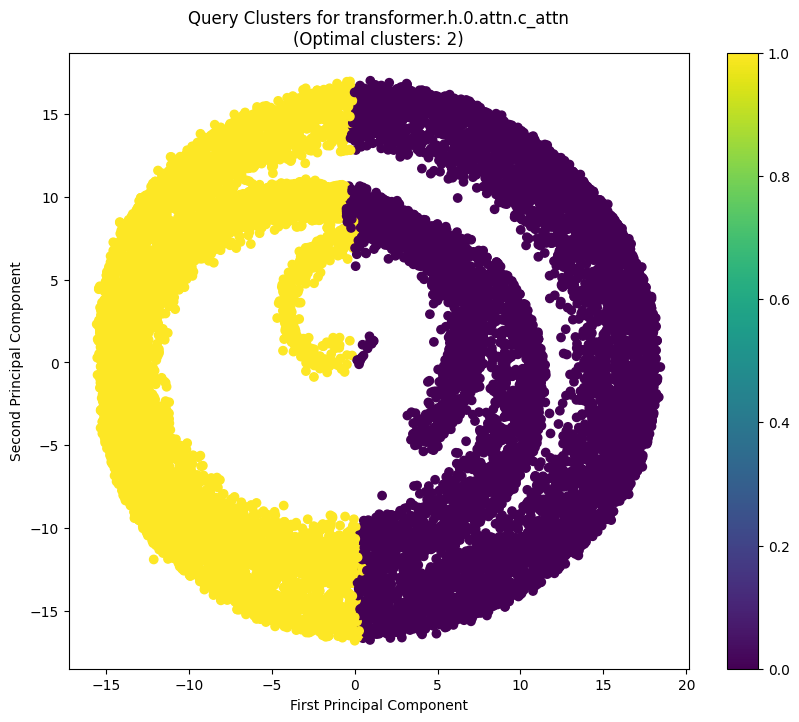

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


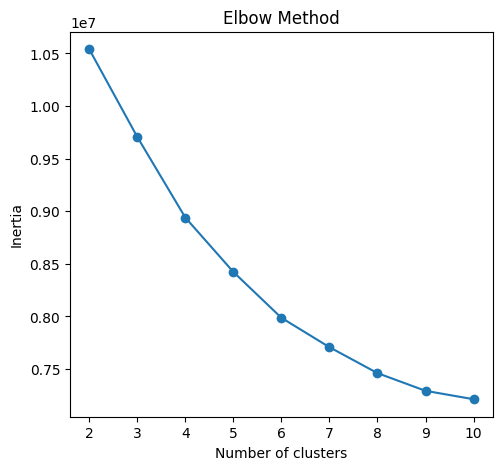

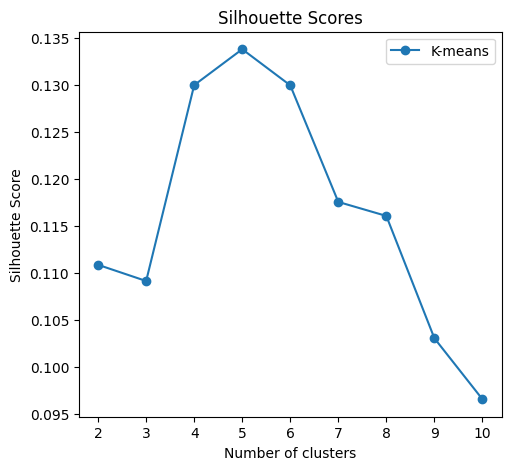

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 5


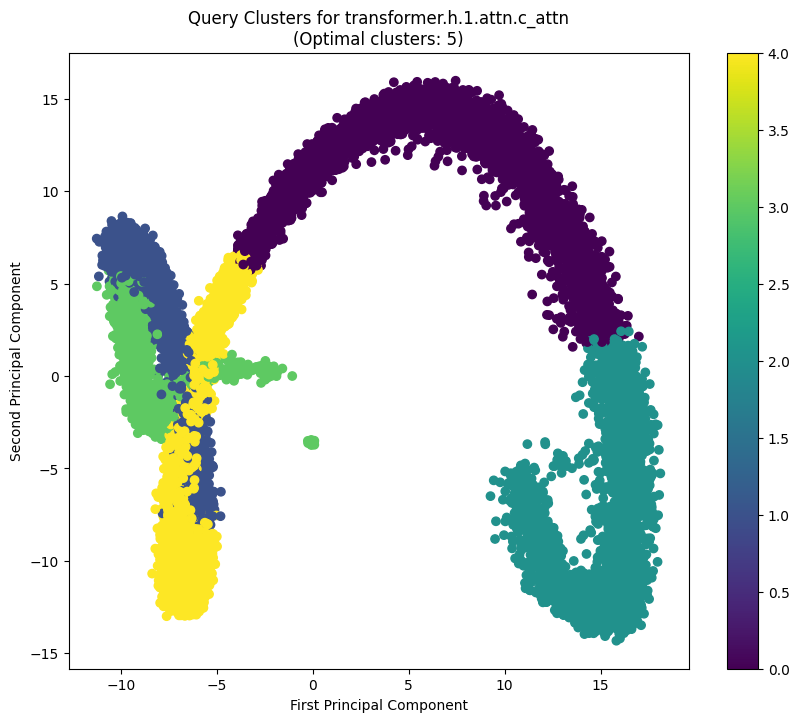

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


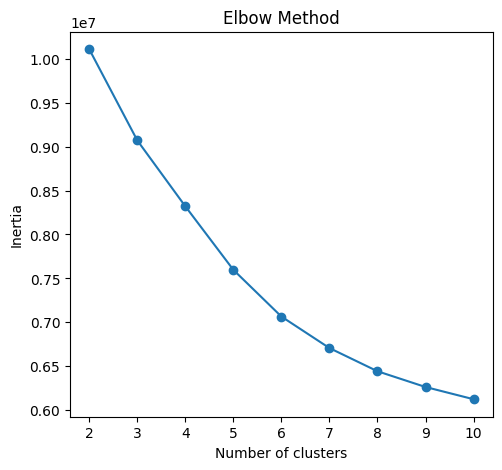

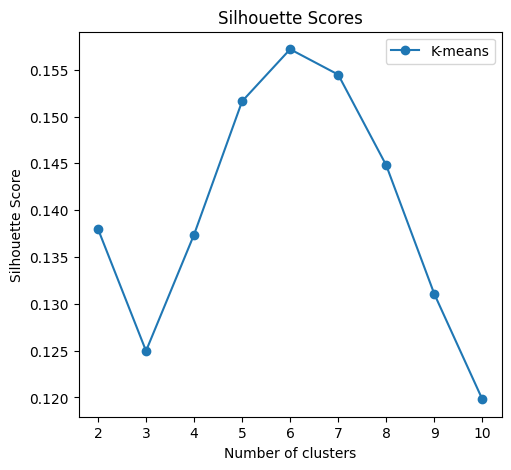

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 6


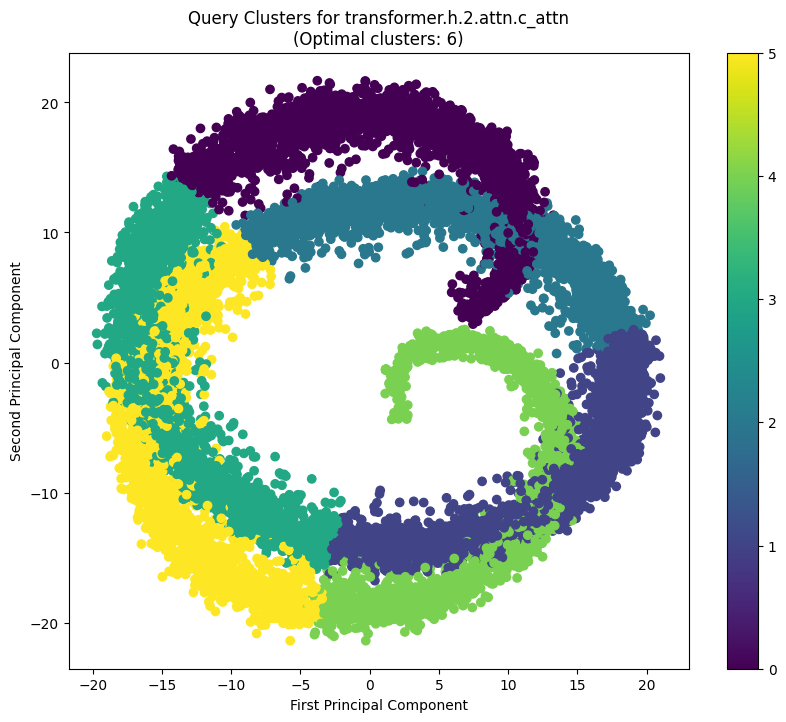

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


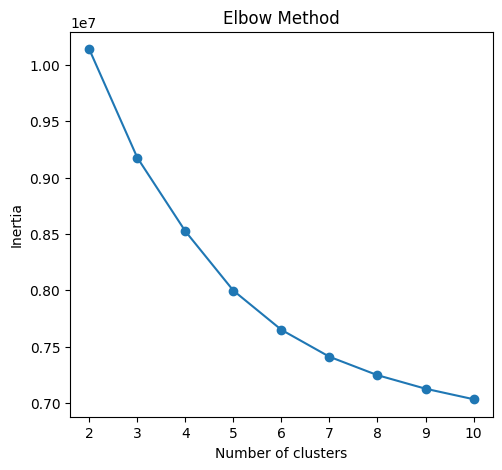

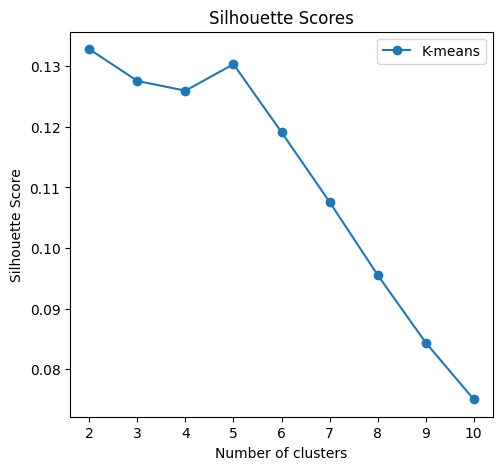

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


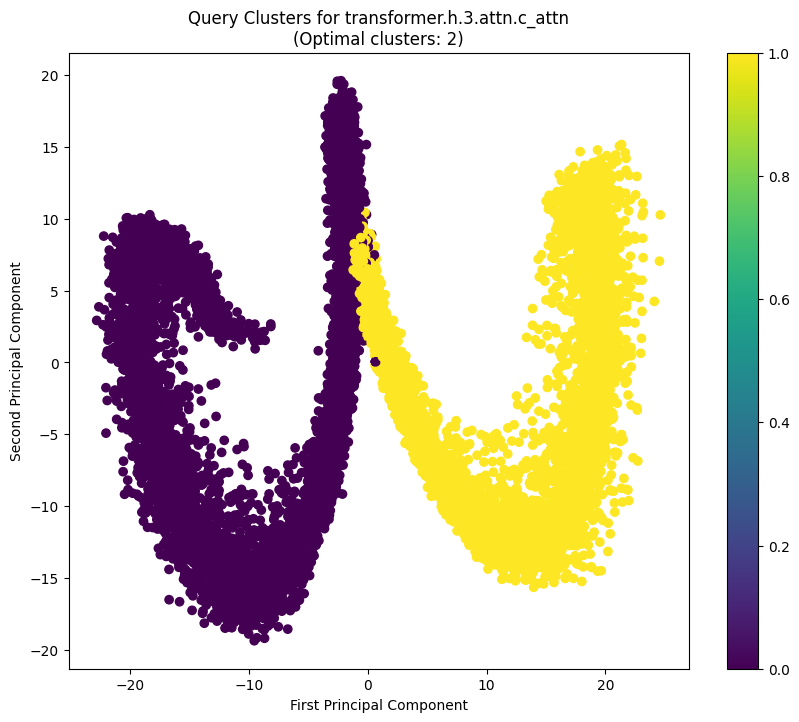

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


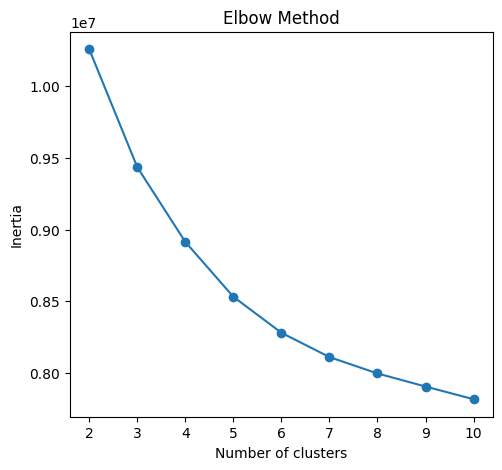

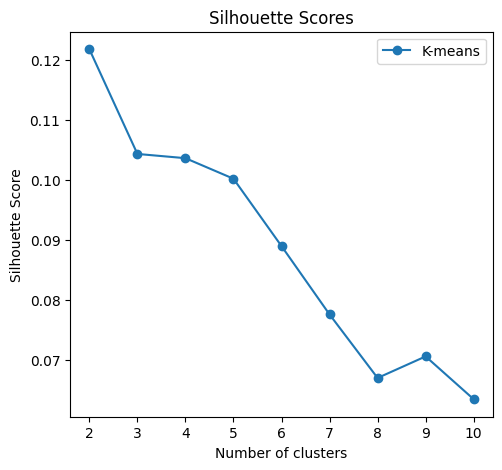

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


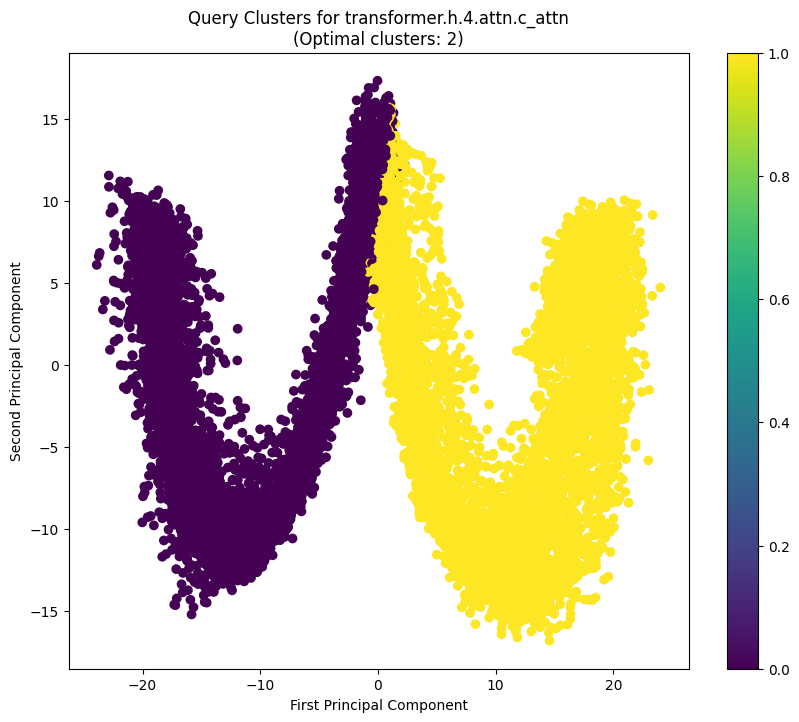

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


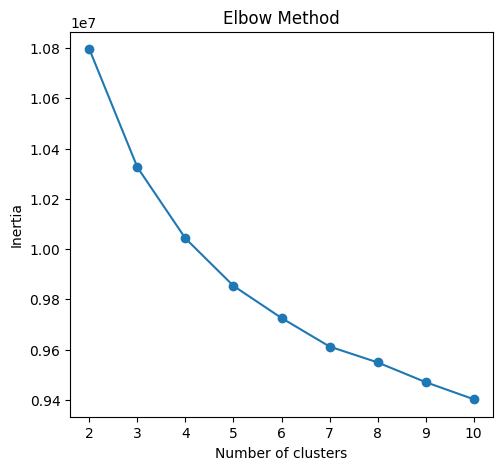

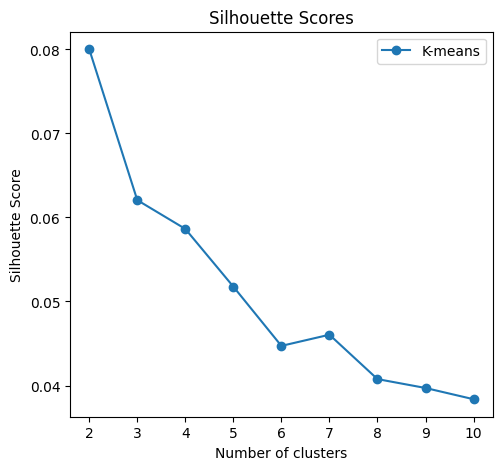

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


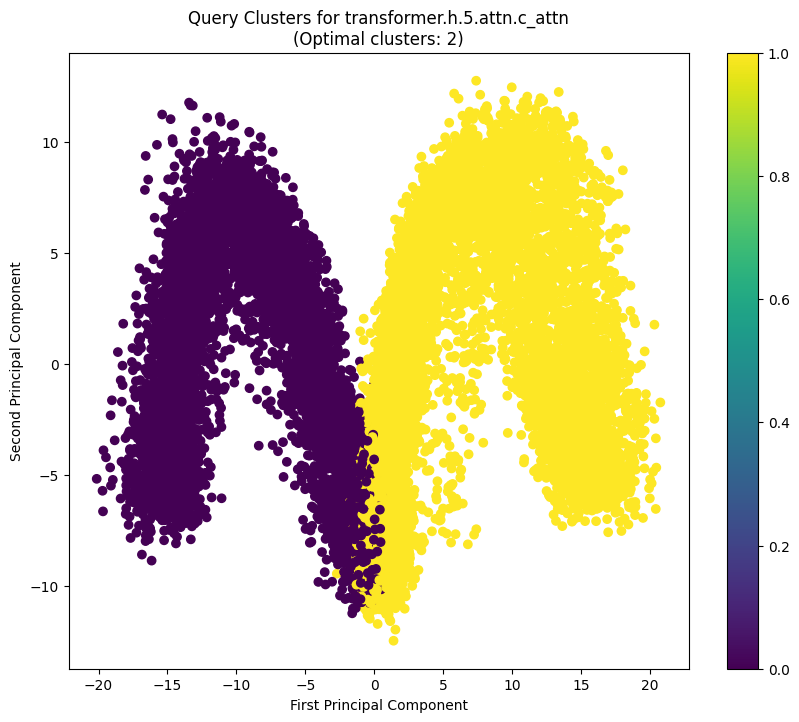

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


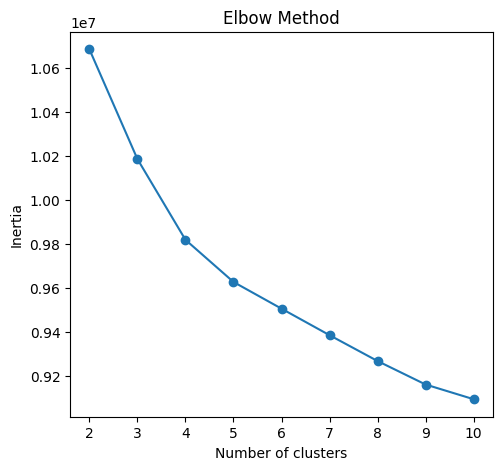

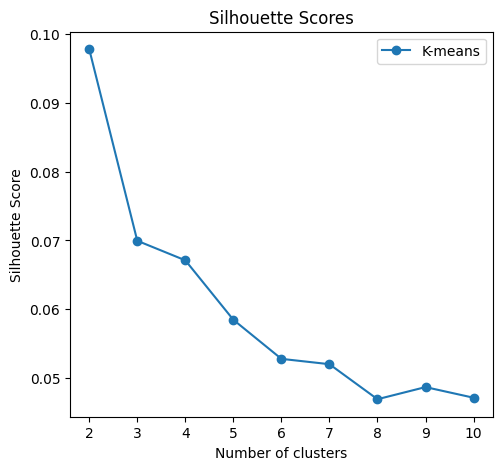

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


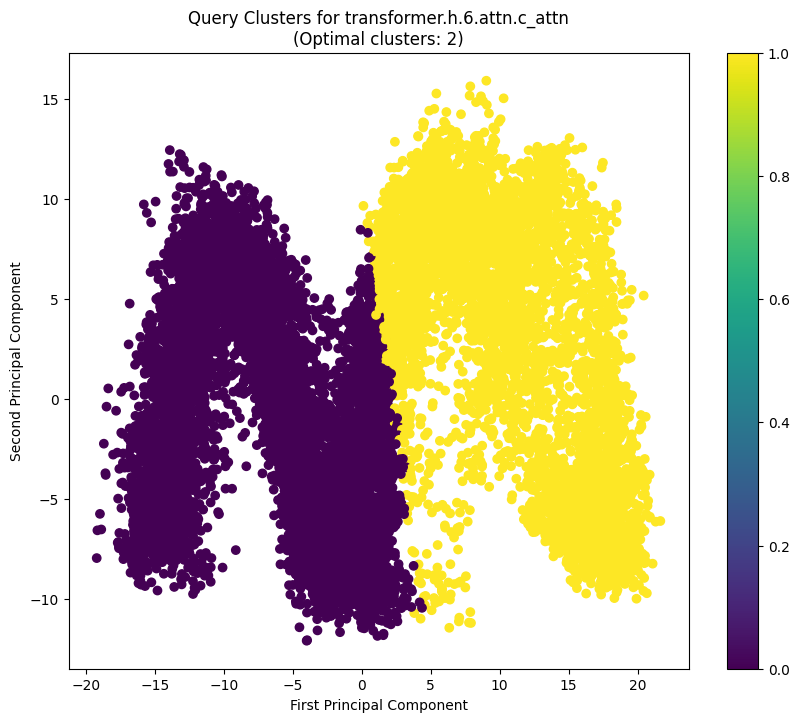

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


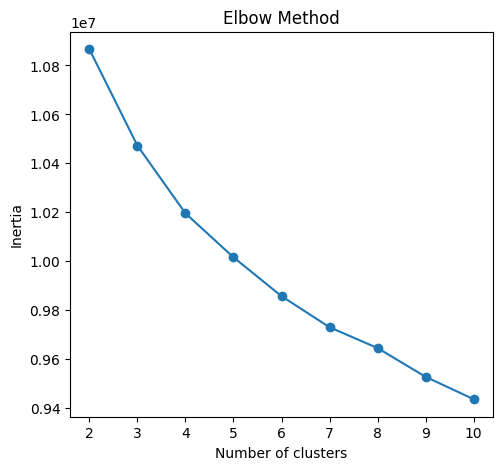

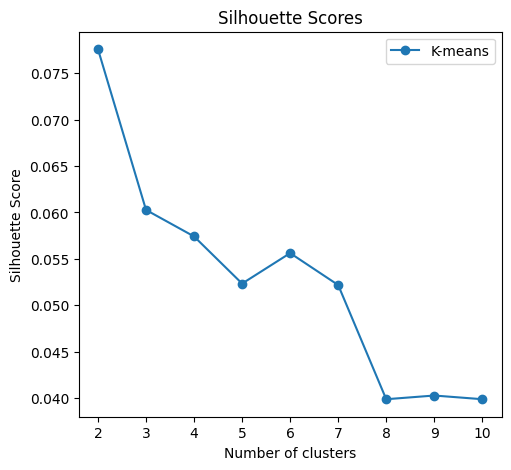

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


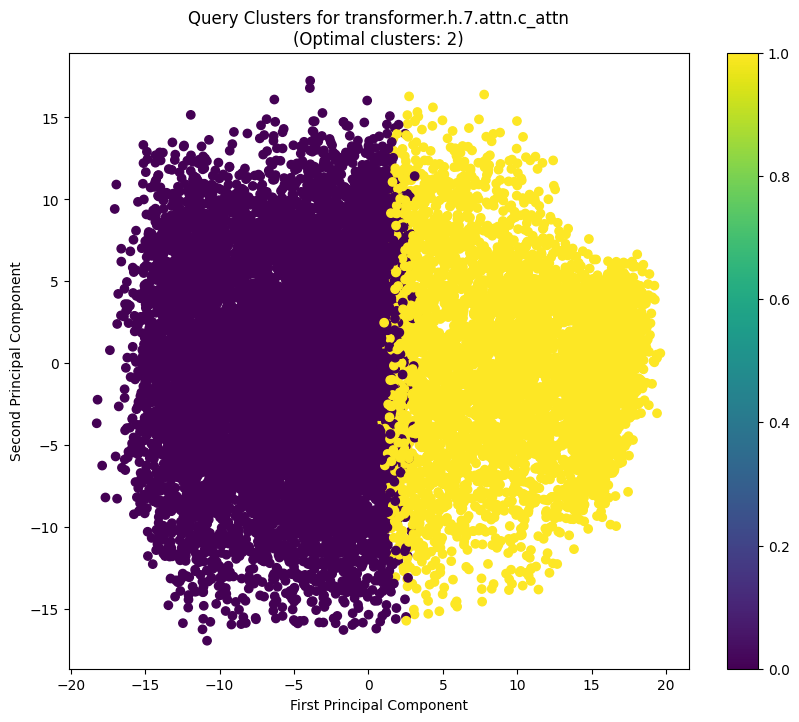

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


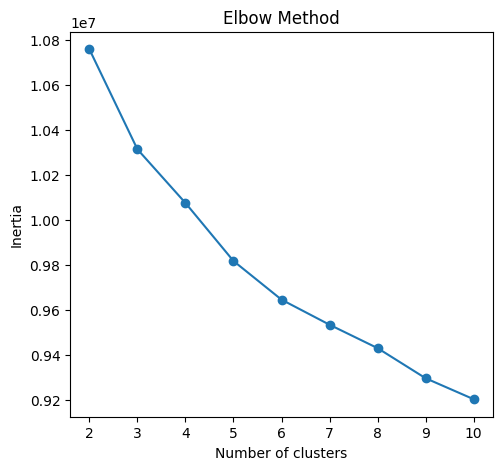

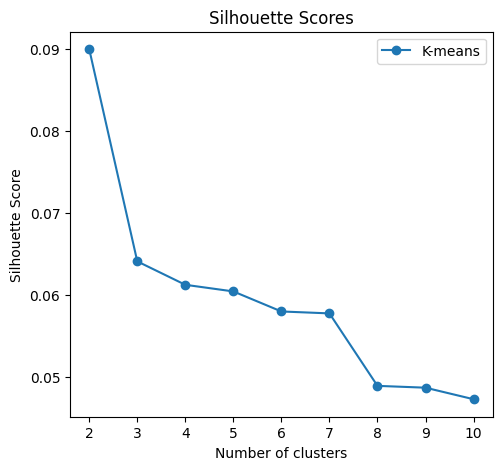

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


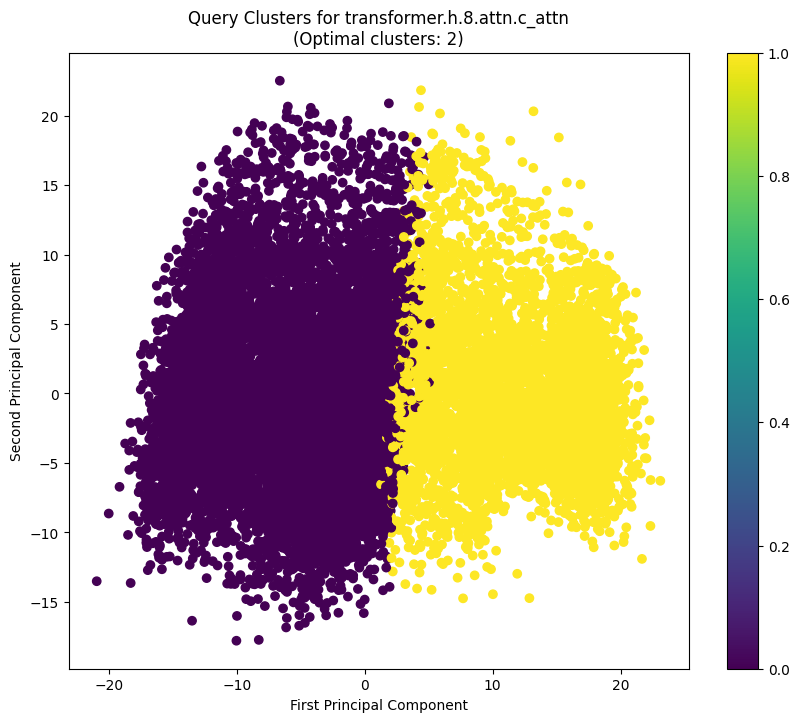

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


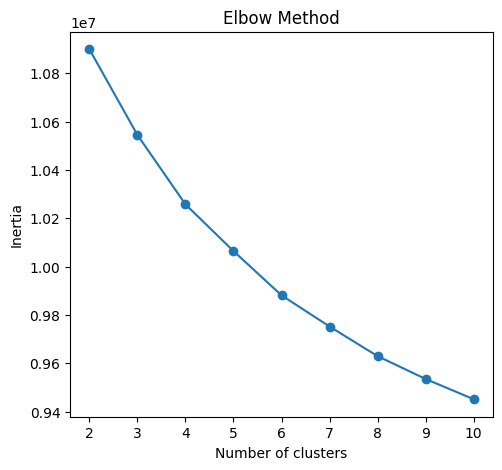

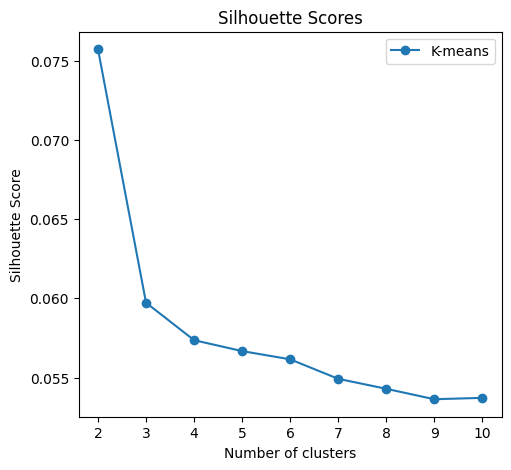

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


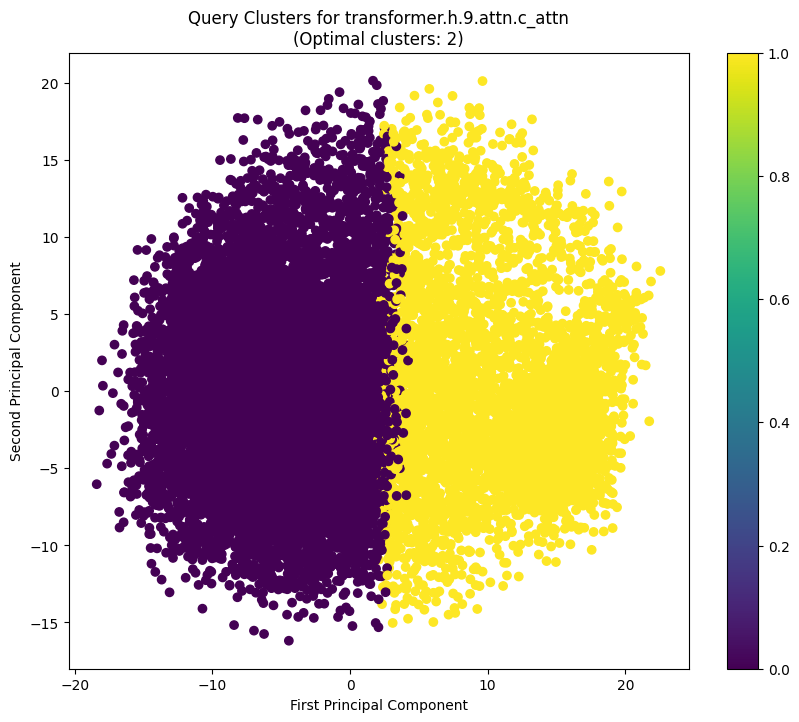

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


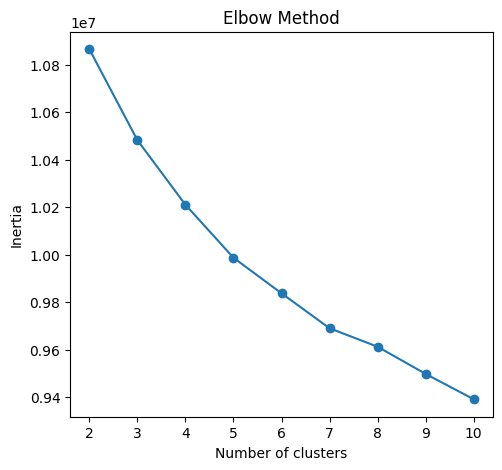

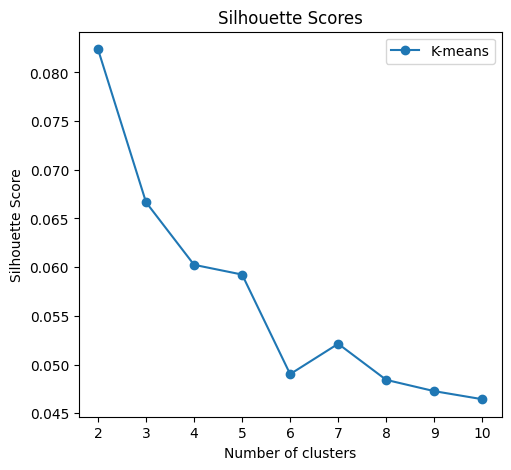

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


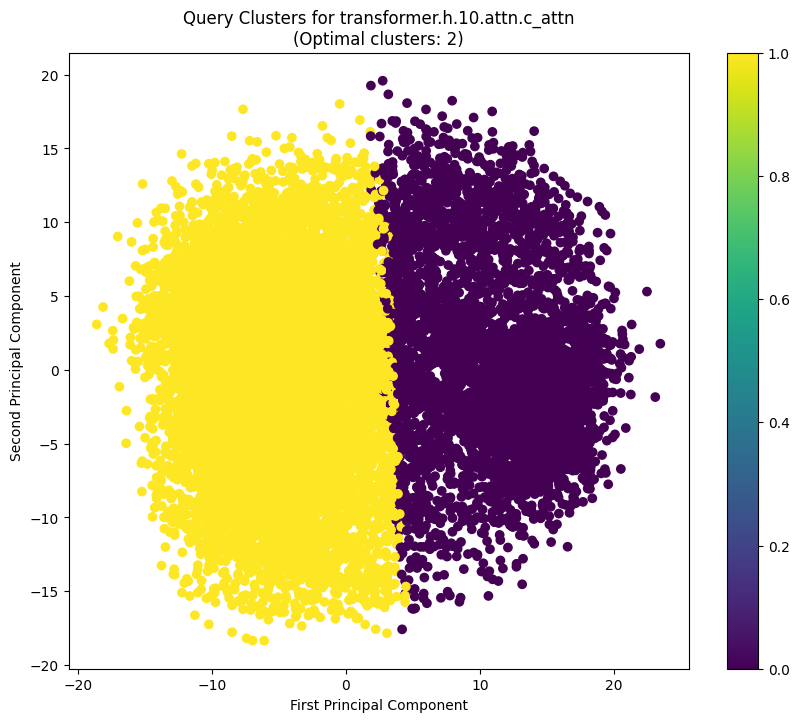

  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])
  Query shape: torch.Size([1024, 768])


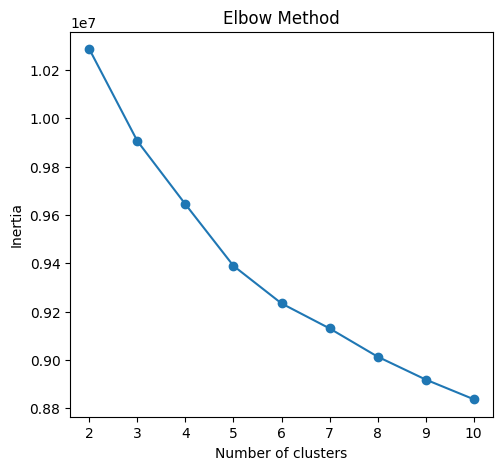

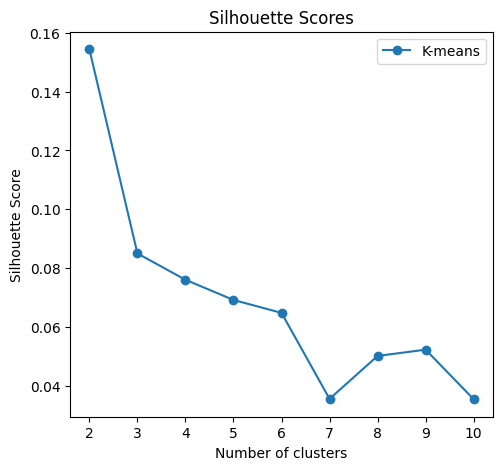

<Figure size 640x480 with 0 Axes>

Optimal clusters (K-means): 2


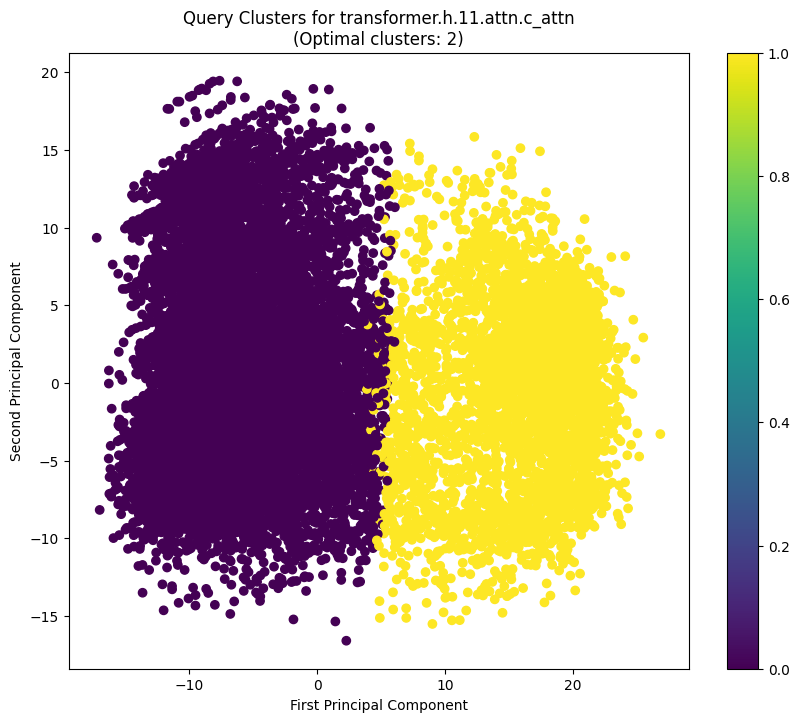

In [ ]:
# %%

clusters = np.random.randn(2, head_dim)
for name, samples_out in all_intermediates.items():
    all_q_projs = []
    for qkv in samples_out:
        qkv = qkv.squeeze(0)
        # The c_attn output contains q, k, v concatenated
        split_size = qkv.size(-1) // 3
        q, k, v = torch.split(qkv, split_size, dim=-1)
        print(f"  Query shape: {q.shape}")
        all_q_projs.append(q.numpy())

        # alignments = np.dot(q, clusters.T)

    all_q_projs = np.vstack(all_q_projs)
    # Standardize the data
    scaler = StandardScaler()
    all_queries_scaled = scaler.fit_transform(all_q_projs)

    # Compute inertias and silhouette scores for different numbers of clusters
    inertias = []
    kmeans_silhouette_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(all_queries_scaled)
        inertias.append(kmeans.inertia_)
        kmeans_silhouette_scores.append(
            silhouette_score(all_queries_scaled, kmeans.labels_)
        )

    # Plot elbow curve
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(range(2, max_clusters + 1), inertias, marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Method")

    # Plot silhouette scores
    plt.figure(figsize=(12, 5))
    plt.subplot(122)
    plt.plot(
        range(2, max_clusters + 1),
        kmeans_silhouette_scores,
        marker="o",
        label="K-means",
    )

    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores")
    plt.legend()
    plt.show()

    plt.tight_layout()
    plt.show()

    # Determine optimal number of clusters for each method
    kmeans_optimal = kmeans_silhouette_scores.index(max(kmeans_silhouette_scores)) + 2

    print(f"Optimal clusters (K-means): {kmeans_optimal}")

    # Perform clustering with optimal number and visualize
    kmeans = KMeans(n_clusters=kmeans_optimal, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(all_queries_scaled)

    # Use PCA to reduce to 2D for visualization
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    queries_2d = pca.fit_transform(all_queries_scaled)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(queries_2d[:, 0], queries_2d[:, 1], c=kmeans_labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(f'Query Clusters for {name}\n(Optimal clusters: {kmeans_optimal})')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()